In [4]:
import pandas as pd
from pathlib import Path
# import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pybedtools
from pybedtools import BedTool

warnings.filterwarnings("ignore")

In [5]:
model_organisms = [f for f in Path("pattern_merged_abacaba")\
                                       .glob("*.merged.txt")]
model_organisms

[PosixPath('pattern_merged_abacaba/fr3_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/ce11_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/GCF_000013425.1_ASM1342v1_genomic_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/dm6_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/danRer11_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/galGal6_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/GCF_000008865.2_ASM886v2_genomic_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/sacCer3_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/GCF_000240185.1_ASM24018v2_genomic_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.merged.txt')]

In [6]:
organism_names_all = {
                   'GCF_000002985.6': 'C. elegans',
                   'GCF_000146045.2': 'S. cerevisiae',
                   'GCF_009914755.1': 'H. sapiens',
                   'dm6': 'D. melanogaster',
                   'galGal6': 'G. gallus',
                   'danRer11': 'D. rerio',
                   'GCF_000013425.1': 'S. aureus',
                   'GCF_000240185.1': 'K. pneumoniae',
                   'GCF_000008865.2': 'E. coli'
    }
organism_names_all

{'GCF_000002985.6': 'C. elegans',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [4]:
from tqdm import tqdm

avoidmers_df = []
nucleotides = {"a", "g", "c", "t"}

for model in tqdm(model_organisms, leave=True, position=0):
    
    df = pd.read_csv(model)
    if "chm13v2" in model.name or "fr3" in model.name:
        continue
        
    # df = df[df["sequence"].apply(lambda x: all(c in nucleotides for c in x))]
    if "GC" in model.name:
        organism_name = "_".join(model.name.split("_")[:2])
    else:
        organism_name = model.name.split("_")[0]
        
    df.loc[:, "organism"] = organism_name
    avoidmers_df.append(df)
    
avoidmers_df  = pd.concat(avoidmers_df, axis=0)
avoidmers_df

100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.73it/s]


,seqID,start,end,overlapCount,mergedSequence,organism
0,chrI,6208,6259,2,aactcctcgacgacgtcttccatatcaactttcgagaagaatggca...,ce11
1,chrI,8352,8404,3,aatccccgaccaggtagaaaatgagcacaccgattaagtttctcca...,ce11
2,chrI,8562,8613,2,tcagccgtaatcaggtgacctcattaggcctacccaaacacagatt...,ce11
3,chrI,10676,10726,1,gaactgcgaccgaacagagattcgttccgccccatattccggccaa...,ce11
4,chrI,12803,12856,4,aagttgaatcacttgacatctgggaaattagtattccaggcgtaag...,ce11
...,...,...,...,...,...,...
12677,NC_016847.1,1516,1566,1,ttccccttcggaaagttcagcatccttgaagatcttttcaacaata...,GCF_000240185.1
12678,NC_016847.1,1695,1748,4,ttcgaatcactttttcatgtgacgaaacatcttcgtagctgccagg...,GCF_000240185.1
12679,NC_016847.1,2958,3014,3,cctgtttccggcgttcttctcctccgaaaacggtgaacggggacgc...,GCF_000240185.1
12680,NC_016847.1,3038,3112,13,agccggaaaaccggttttcagcacgttcaggaatcgggttcgtcga...,GCF_000240185.1


In [5]:
# from tqdm import tqdm

# avoidmers_df = []
# nucleotides = {"a", "g", "c", "t"}

# for model in tqdm(model_organisms, leave=True, position=0):
#     df = pd.read_csv(model)
#     if "chm13v2" in model.name:
#         continue
        
#     df = df[df["sequence"].apply(lambda x: all(c in nucleotides for c in x))]

#     if "GC" in model.name:
#         organism_name = "_".join(model.name.split("_")[:2])
#     else:
#         organism_name = model.name.split("_")[0]
        
#     df.loc[:, "organism"] = organism_name
#     avoidmers_df.append(df)
    
# avoidmers_df  = pd.concat(avoidmers_df, axis=0)
# avoidmers_df

In [6]:
# chromosome_sizes = pd.read_table("/storage/group/izg5139/default/DNA-Avoidmers/scripts/genome_chromosome_sizes.txt")\
#                         .rename(columns={"length": "chrLen"})
# chromosome_sizes

In [14]:
avoidmers_df_m = avoidmers_df\
                    .merge(chromosome_sizes, 
                           on=["organism", "seqID"], 
                           how="left"
                          )

avoidmers_df_m

NameError: name 'chromosome_sizes' is not defined

In [7]:
genome_sizes = pd.read_table("genome_sizes.txt", header=None).set_index(0)[1].to_dict()
genome_sizes

{'ce11': 100286401,
 'chm13v2.0': 3117292070,
 'danRer11': 1679203469,
 'dm6': 143726002,
 'fr3': 391484715,
 'galGal6': 1065365425,
 'sacCer3': 12157105,
 'GCF_000008865.2': 5594605,
 'GCF_000013425.1': 2821361,
 'GCF_000240185.1': 5682322}

In [ ]:
genome_sizes = chromosome_sizes.groupby("organism").agg({'chrLen': 'sum'})['chrLen'].to_dict()
genome_sizes

# Calculate Genome Density

In [8]:
from tqdm import tqdm

densities = {}
for organism in tqdm(avoidmers_df['organism'].unique()):
    temp = avoidmers_df[avoidmers_df['organism'] == organism]
    temp.loc[:, "length"] = temp["end"] - temp["start"]
    total_bp = temp['length'].sum()
    densities.update({organism: 1e6 * (total_bp / genome_sizes[organism]) })

densities

100%|█████████████████████████████████████████████| 8/8 [00:01<00:00,  5.68it/s]


{'ce11': np.float64(70595.862743145),
 'GCF_000013425.1': np.float64(76111.1392693101),
 'dm6': np.float64(105609.9716737407),
 'danRer11': np.float64(58493.34390578251),
 'galGal6': np.float64(72905.70650910695),
 'GCF_000008865.2': np.float64(180904.9968675179),
 'sacCer3': np.float64(118970.10020066454),
 'GCF_000240185.1': np.float64(139211.92779993813)}

In [99]:
# from pybedtools import BedTool
# import pybedtools
# pybedtools.set_tempdir("/storage/home/nmc6088/scratch")
# densities = {}

# for organism in tqdm(avoidmers_df['organism'].unique()):
#     temp = avoidmers_df[avoidmers_df['organism'] == organism]
#     temp_bed = pd.read_table(BedTool.from_dataframe(temp[["seqID", "start", "end"]]).sort().merge().fn,
#                                     header=None,
#                                     names=["seqID", "start", "end"]
#                             )
#     temp_bed.loc[:, "length"] = temp_bed["end"] - temp_bed["start"]
#     total_bp = temp_bed['length'].sum()
#     genome_size = genome_sizes[organism]
#     densities.update({organism: 1e6 * total_bp / genome_size})
    
# densities

In [9]:
densities = pd.Series(densities).to_frame(name='density').reset_index()
densities

,index,density
0,ce11,70595.862743
1,GCF_000013425.1,76111.139269
2,dm6,105609.971674
3,danRer11,58493.343906
4,galGal6,72905.706509
5,GCF_000008865.2,180904.996868
6,sacCer3,118970.100201
7,GCF_000240185.1,139211.927800


In [1]:
organism_names_all = {
                   'ce11': 'C. elegans',
                   'sacCer3': 'S. cerevisiae',
                   'GCF_009914755.1': 'H. sapiens',
                   'dm6': 'D. melanogaster',
                   'galGal6': 'G. gallus',
                   'danRer11': 'D. rerio',
                   'GCF_000013425.1': 'S. aureus',
                   'GCF_000240185.1': 'K. pneumoniae',
                   'GCF_000008865.2': 'E. coli'
}
organism_names_all

{'ce11': 'C. elegans',
 'sacCer3': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [11]:
densities = densities.rename(columns={'index': 'name'})
densities

,name,density
0,ce11,70595.862743
1,GCF_000013425.1,76111.139269
2,dm6,105609.971674
3,danRer11,58493.343906
4,galGal6,72905.706509
5,GCF_000008865.2,180904.996868
6,sacCer3,118970.100201
7,GCF_000240185.1,139211.927800


In [12]:
# densities = pd.Series(densities).to_frame(name='density').reset_index()
densities.loc[:, "name"] = densities.name.map(lambda x: organism_names_all[x])
densities

,name,density
0,C. elegans,70595.862743
1,S. aureus,76111.139269
2,D. melanogaster,105609.971674
3,D. rerio,58493.343906
4,G. gallus,72905.706509
5,E. coli,180904.996868
6,S. cerevisiae,118970.100201
7,K. pneumoniae,139211.927800


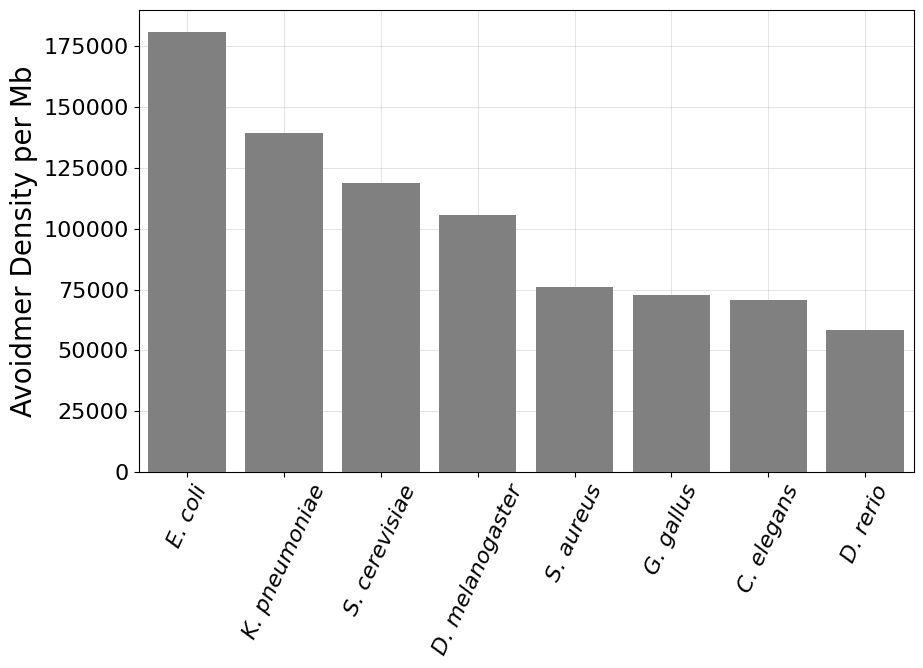

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
densities.sort_values(by=['density'], ascending=False, inplace=True)
sns.barplot(data=densities, x=densities['name'], y="density", color='gray', ax=ax, zorder=3)
ax.set_axisbelow(True)
ax.set_ylabel("Avoidmer Density per Mb")
ax.yaxis.label.set_size(20)
ax.set_xlabel("")
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="both", labelsize=16)
ax.tick_params(axis="x", rotation=65)
labels = ax.get_xticklabels()
for l in labels:
    l.set_style('italic')
# ax.axhline(104, linestyle='--', color='crimson', lw=3.0)

save_location = Path("model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/density_model_organism_per_mb.png", bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '/storage/group/izg5139/default/external/zimie/model_organisms'

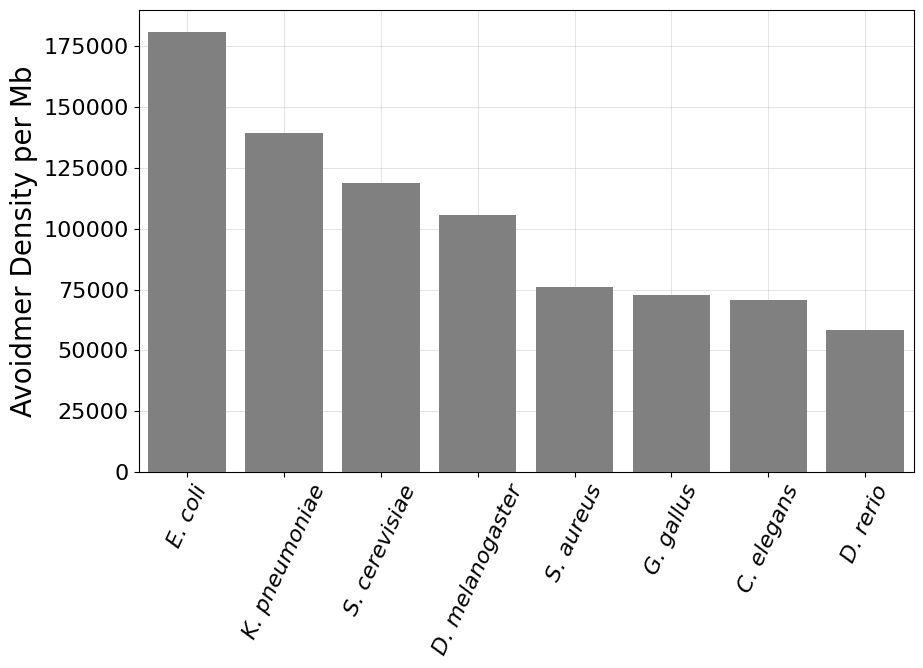

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
densities.sort_values(by=['density'], ascending=False, inplace=True)
sns.barplot(data=densities, x=densities['name'], y="density", color='gray', ax=ax, zorder=3)
ax.set_axisbelow(True)
ax.set_ylabel("Avoidmer Density per Mb")
ax.yaxis.label.set_size(20)
ax.set_xlabel("")
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="both", labelsize=16)
ax.tick_params(axis="x", rotation=65)
labels = ax.get_xticklabels()
for l in labels:
    l.set_style('italic')
# ax.axhline(104, linestyle='--', color='crimson', lw=3.0)

save_location = Path("/storage/group/izg5139/default/external/zimie/model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/density_model_organism_per_mb.png", bbox_inches='tight')

In [14]:
infiles = [f for f in Path("fasta_1mers").glob("*") if f.is_file() and "python" not in f.name and "chm13v2" not in f.name and "fr3" not in f.name]
infiles

[PosixPath('fasta_1mers/sacCer3.fasta_1mers'),
 PosixPath('fasta_1mers/ce11.fasta_1mers'),
 PosixPath('fasta_1mers/danRer11.fasta_1mers'),
 PosixPath('fasta_1mers/GCF_000240185.1_ASM24018v2_genomic.fasta_1mers'),
 PosixPath('fasta_1mers/galGal6.fasta_1mers'),
 PosixPath('fasta_1mers/dm6.fasta_1mers'),
 PosixPath('fasta_1mers/GCF_000013425.1_ASM1342v1_genomic.fasta_1mers'),
 PosixPath('fasta_1mers/GCF_000008865.2_ASM886v2_genomic.fasta_1mers')]

In [15]:
organism_names_all = {
                   'GCF_000002985.6': 'C. elegans',
                   'GCF_000146045.2': 'S. cerevisiae',
                   'GCF_009914755.1': 'H. sapiens',
                   'dm6': 'D. melanogaster',
                    'galGal6': 'G. gallus',
                    'danRer11': 'D. rerio',
                    'GCF_000013425.1': 'S. aureus',
                    'GCF_000240185.1': 'K. pneumoniae',
                    'GCF_000008865.2': 'E. coli',
                   "ce11": "C. elegans",
                  "sacCer3": "S. cerevisiae",
                  "chm13v2.0": "H. sapiens"
                }

In [16]:
gc_content = {}
for infile in infiles:
    temp = {}
    with open(infile) as f:
        for line in f:
            line = line.strip().split(" ")
            temp.update({line[0]: int(line[1])})
        print(temp)
    organism = infile.name.split(".")[0] if ("GC" not in infile.name and "chm" not in infile.name) else '_'.join(infile.name.split('_')[:2])
    gc_content.update({organism_names_all[organism]: (temp['G'] + temp['C'])/(temp['A']+temp['T']+temp['G']+temp['C'])})
    
gc_content

{'A': 3766349, 'C': 2320576, 'G': 2317100, 'T': 3753080}
{'A': 32371810, 'C': 17782105, 'G': 17759142, 'T': 32373344}
{'A': 531052068, 'C': 306412859, 'G': 306418991, 'T': 530625933}
{'A': 1219661, 'C': 1623345, 'G': 1622484, 'T': 1216831}
{'A': 304891002, 'C': 222804210, 'G': 222938439, 'T': 304947308}
{'A': 41351058, 'C': 29960672, 'G': 29928813, 'T': 41332481}
{'A': 938713, 'C': 465832, 'G': 461500, 'T': 955315}
{'A': 1387192, 'C': 1407215, 'G': 1417174, 'T': 1383024}


{'S. cerevisiae': 0.3814786497278752,
 'C. elegans': 0.3543974720959425,
 'D. rerio': 0.36597685563570925,
 'K. pneumoniae': 0.5712153537260567,
 'G. gallus': 0.4222723469948457,
 'D. melanogaster': 0.4200618274043202,
 'S. aureus': 0.3286826211472481,
 'E. coli': 0.5048415393043835}

In [17]:
densities.loc[:, 'gc_content'] = densities['name'].map(gc_content)
densities.loc[:, 'gc/at'] = densities['gc_content'] / (1 - densities['gc_content'])
densities

,name,density,gc_content,gc/at
5,E. coli,180904.996868,0.504842,1.019556
7,K. pneumoniae,139211.927800,0.571215,1.332173
6,S. cerevisiae,118970.100201,0.381479,0.616759
2,D. melanogaster,105609.971674,0.420062,0.724322
1,S. aureus,76111.139269,0.328683,0.489608
4,G. gallus,72905.706509,0.422272,0.730919
0,C. elegans,70595.862743,0.354397,0.548941
3,D. rerio,58493.343906,0.365977,0.577229


In [489]:
densities.sort_values(by=['density'], ascending=False)

,name,density,gc_content,gc/at
0,E. coli,180904.996868,0.504842,1.019556
2,K. pneumoniae,139211.927800,0.571215,1.332173
7,S. cerevisiae,118970.100201,0.381479,0.616759
5,D. melanogaster,103822.494137,0.420062,0.724322
1,S. aureus,76111.139269,0.328683,0.489608
3,C. elegans,70595.862743,0.354397,0.548941
4,D. rerio,56765.670009,0.365977,0.577229
6,G. gallus,41867.238183,0.422272,0.730919


In [19]:
!pip install -q scikit-learn

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model

LinearRegression()

In [49]:
poly_trans = PolynomialFeatures(degree=4)
poly_trans

PolynomialFeatures(degree=4)

In [50]:
densities.sort_values(by=['gc_content'], ascending=True, inplace=True)

In [51]:
X = densities[['gc_content']]
y = densities['density']

X_trans = pd.DataFrame(
                       poly_trans.fit_transform(X),
                       columns=poly_trans.get_feature_names_out()
                      )
X_trans

,1,gc_content,gc_content^2,gc_content^3,gc_content^4
0,1.0,0.328683,0.108032,0.035508,0.011671
1,1.0,0.354397,0.125598,0.044511,0.015775
2,1.0,0.365977,0.133939,0.049019,0.017940
3,1.0,0.381479,0.145526,0.055515,0.021178
4,1.0,0.420062,0.176452,0.074121,0.031135
5,1.0,0.422272,0.178314,0.075297,0.031796
6,1.0,0.504842,0.254865,0.128666,0.064956
7,1.0,0.571215,0.326287,0.186380,0.106463


In [52]:
model = LinearRegression()
model.fit(X_trans, y)

LinearRegression()

In [53]:
y_trans = model.predict(X_trans)
y_trans

array([ 70766.39509111,  79865.41480845,  81028.31000791,  82319.47690474,
        94584.47788034,  95907.85662054, 178734.40445094, 139596.71320505])

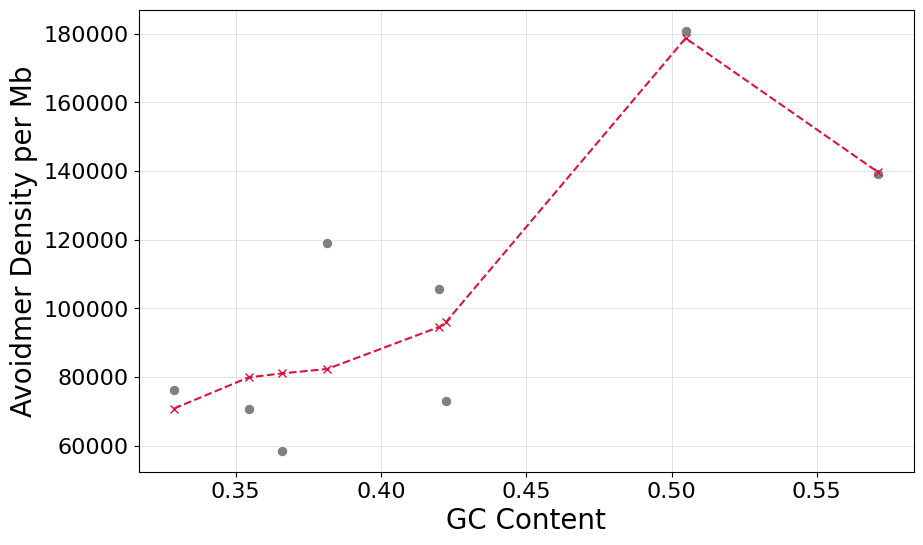

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.scatterplot(data=densities, 
                x='gc_content', 
                y="density", 
                s=55,
                color='gray', 
                ax=ax)
ax.plot(X_trans['gc_content'], y_trans, linestyle='--', marker='x', color='crimson')
ax.set_axisbelow(True)
ax.set_ylabel("Avoidmer Density per Mb")
ax.yaxis.label.set_size(20)
ax.set_xlabel("GC Content")
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="both", labelsize=16)
# ax.tick_params(axis="x", rotation=65)
ax.xaxis.label.set_size(20)
labels = ax.get_xticklabels()
# for l in labels:
#    l.set_style('italic')
# ax.axhline(104, linestyle='--', color='crimson', lw=3.0)

# save_location = Path("/storage/group/izg5139/default/external/zimie/model_organisms")
# save_location.mkdir(exist_ok=True)
# fig.savefig(f"{save_location}/density_model_organism_per_mb.png", bbox_inches='tight')

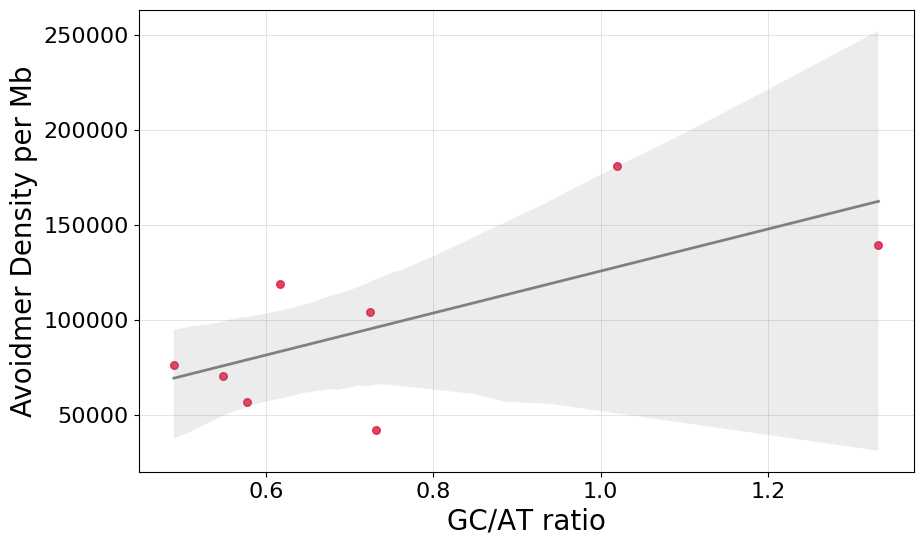

In [490]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.regplot(data=densities, x='gc/at', y="density", line_kws={'lw': 2.0, 'linestyle': '-', 'color': 'gray'}, scatter_kws={'s': 30, 'color': 'crimson'}, color='gray', ax=ax)
ax.set_axisbelow(True)
ax.set_ylabel("Avoidmer Density per Mb")
ax.yaxis.label.set_size(20)
ax.set_xlabel("GC/ΑΤ ratio")
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="both", labelsize=16)
# ax.tick_params(axis="x", rotation=65)
labels = ax.get_xticklabels()
ax.xaxis.label.set_size(20)

# for l in labels:
#    l.set_style('italic')
# ax.axhline(104, linestyle='--', color='crimson', lw=3.0)

save_location = Path("/storage/group/izg5139/default/external/zimie/model_organisms")
save_location.mkdir(exist_ok=True)
# fig.savefig(f"{save_location}/density_model_organism_per_mb.png", bbox_inches='tight')

# Maximal Avoidmers

In [55]:
maximum_avoidmers = [f for f in Path("pattern_merged_abacaba").glob("*.maximum_zimin.txt")]
maximum_avoidmers

[PosixPath('pattern_merged_abacaba/ce11_abacaba_words_length_50.maximum_zimin.txt'),
 PosixPath('pattern_merged_abacaba/galGal6_abacaba_words_length_50.maximum_zimin.txt'),
 PosixPath('pattern_merged_abacaba/GCF_000240185.1_ASM24018v2_genomic_abacaba_words_length_50.maximum_zimin.txt'),
 PosixPath('pattern_merged_abacaba/fr3_abacaba_words_length_50.maximum_zimin.txt'),
 PosixPath('pattern_merged_abacaba/danRer11_abacaba_words_length_50.maximum_zimin.txt'),
 PosixPath('pattern_merged_abacaba/GCF_000013425.1_ASM1342v1_genomic_abacaba_words_length_50.maximum_zimin.txt'),
 PosixPath('pattern_merged_abacaba/GCF_000008865.2_ASM886v2_genomic_abacaba_words_length_50.maximum_zimin.txt'),
 PosixPath('pattern_merged_abacaba/sacCer3_abacaba_words_length_50.maximum_zimin.txt'),
 PosixPath('pattern_merged_abacaba/dm6_abacaba_words_length_50.maximum_zimin.txt'),
 PosixPath('pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.maximum_zimin.txt')]

In [56]:
maxie_zimie = []

for f in maximum_avoidmers:
    if "chm" in f.name or "fr3" in f.name:
        continue
        
    maxie_zimie.append(pd.read_csv(f))
    maxie_zimie[-1].loc[:, "organism"] = f.name.split("_")[0] if "GC" not in f.name else '_'.join(f.name.split('_')[:2])
    
maxie_zimie = pd.concat(maxie_zimie, axis=0)\
                .groupby("organism", as_index=False).agg({"length": "max"})
maxie_zimie

,organism,length
0,GCF_000008865.2,101
1,GCF_000013425.1,86
2,GCF_000240185.1,109
3,ce11,101
4,danRer11,100
5,dm6,103
6,galGal6,105
7,sacCer3,115


In [80]:
# avoidmers_df.groupby("organism", as_index=False).agg({"length": "max"})

In [101]:
# grouped_maximal = avoidmers_df.groupby("organism")\
#                               .agg({"length": "max"})\
#                               .sort_values(by=["length"], ascending=False)
# grouped_maximal

In [57]:
organism_names_all = {
                    'ce11': 'C. elegans',
                    'sacCer3': 'S. cerevisiae',
                    'GCF_009914755.1': 'H. sapiens',
                    'dm6': 'D. melanogaster',
                    'galGal6': 'G. gallus',
                    'danRer11': 'D. rerio',
                    'GCF_000013425.1': 'S. aureus',
                    'GCF_000240185.1': 'K. pneumoniae',
                    'GCF_000008865.2': 'E. coli'
                  }

In [58]:
maxie_zimie.loc[:, "organism"] = maxie_zimie["organism"].apply(lambda x: organism_names_all[x])
maxie_zimie

,organism,length
0,E. coli,101
1,S. aureus,86
2,K. pneumoniae,109
3,C. elegans,101
4,D. rerio,100
5,D. melanogaster,103
6,G. gallus,105
7,S. cerevisiae,115


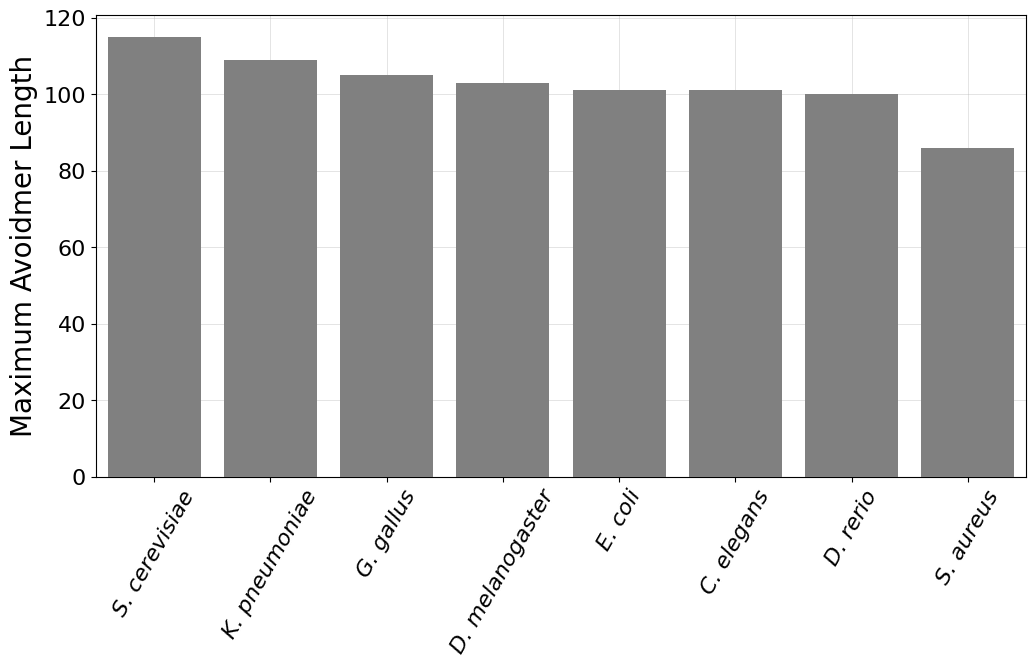

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.barplot(data=maxie_zimie.sort_values(by=['length'], ascending=False), 
            x="organism", 
            y="length", 
            color='gray', 
            ax=ax, 
            zorder=3
           )
ax.set_axisbelow(True)
ax.set_ylabel("Maximum Avoidmer Length")
ax.yaxis.label.set_size(20)
ax.set_xlabel("")
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="both", labelsize=16)
ax.tick_params(axis="x", rotation=60)

labels = ax.get_xticklabels()
for l in labels:
    l.set_style('italic')
    
# ax.axhline(104, linestyle='--', color='crimson', lw=3.0)

save_location = Path("model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/maximal_avoidmers_model_organisms.png", bbox_inches='tight')

# CDS 

In [60]:
chromosome_map = {
        "ce11": {
            "I": "NC_003279.8",	
            "II": "NC_003280.10",
            "III": "NC_003281.10",
            "IV": "NC_003282.8",
            "V": "NC_003283.11",
            "X": "NC_003284.9",
            "M": "NC_001328.1"
        },
        "sacCer3": {
                "I": "NC_001133.9",
                "II": "NC_001134.8",	
                "III": "NC_001135.5",		
                "IV": "NC_001136.10",	
                "V": "NC_001137.3",
                "VI": "NC_001138.5",	
                "VII": "NC_001139.9",		
                "VIII": "NC_001140.6",	
                "IX": "NC_001141.2",	
                "X": "NC_001142.9",
                "XI": "NC_001143.9",
                "XII": "NC_001144.5",	
                "XIII": "NC_001145.3",	
                "XIV": "NC_001146.8",	
                "XV": "NC_001147.6",	
                "XVI": "NC_001148.4",	
                "M": "NC_001224.1",
        },
    "chm13v2.0": {
            "1": 'NC_060925.1',
            "2": 'NC_060926.1',	
            "3": 'NC_060927.1',
            "4": 'NC_060928.1',
            "5": 'NC_060929.1',
            "6": 'NC_060930.1',
            "7": 'NC_060931.1',
            "8": 'NC_060932.1',
            "9": 'NC_060933.1',	
            "10": 'NC_060934.1',	
            "11": 'NC_060935.1',	
            "12": 'NC_060936.1',		
            "13": 'NC_060937.1',	
            "14": 'NC_060938.1',
            "15": 'NC_060939.1',		
            "16": 'NC_060940.1',		
            "17": 'NC_060941.1',	
            "18": 'NC_060942.1',	
            "19": 'NC_060943.1',	
            "20": 'NC_060944.1',	
            "21": 'NC_060945.1',	
            "22": 'NC_060946.1',	
            "X": 'NC_060947.1',
            "Y": 'NC_060948.1'
    }
}

In [104]:
gff_files = {"_".join(f.name.split("_")[:2]): f for f in Path("gff").glob("*.gtf.gz")} | \
            {"_".join(f.name.split("_")[:2]): f for f in Path("gff").glob("*.gff.gz")}
gff_files

{'galGal6.ncbiRefSeq.gtf.gz': PosixPath('gff/galGal6.ncbiRefSeq.gtf.gz'),
 'danRer11.ncbiRefSeq.gtf.gz': PosixPath('gff/danRer11.ncbiRefSeq.gtf.gz'),
 'ce11.ncbiRefSeq.gtf.gz': PosixPath('gff/ce11.ncbiRefSeq.gtf.gz'),
 'dm6.ncbiRefSeq.gtf.gz': PosixPath('gff/dm6.ncbiRefSeq.gtf.gz'),
 'sacCer3.ncbiRefSeq.gtf.gz': PosixPath('gff/sacCer3.ncbiRefSeq.gtf.gz'),
 'fr3.ncbiRefSeq.gtf.gz': PosixPath('gff/fr3.ncbiRefSeq.gtf.gz')}

In [112]:
gtf_ce11.iloc[0][8]

'gene_id "LOC107050604"; transcript_id "XM_025146505.1";  gene_name "LOC107050604";'

In [119]:
gtf_ce11 = pd.read_table(gff_files['ce11.ncbiRefSeq.gtf.gz'], comment='#', header=None)
gtf_ce11

,0,1,2,3,4,5,6,7,8
0,chrI,ncbiRefSeq,transcript,3747,3909,.,-,.,"gene_id ""Y74C9A.6""; transcript_id ""NR_001477.2..."
1,chrI,ncbiRefSeq,exon,3747,3909,.,-,.,"gene_id ""Y74C9A.6""; transcript_id ""NR_001477.2..."
2,chrI,ncbiRefSeq,transcript,4221,10148,.,-,.,"gene_id ""homt-1""; transcript_id ""NM_058260.4"";..."
3,chrI,ncbiRefSeq,exon,4221,4358,.,-,.,"gene_id ""homt-1""; transcript_id ""NM_058260.4"";..."
4,chrI,ncbiRefSeq,CDS,4224,4358,.,-,0,"gene_id ""homt-1""; transcript_id ""NM_058260.4"";..."
...,...,...,...,...,...,...,...,...,...
516992,chrX,ncbiRefSeq,CDS,17717328,17717443,.,+,0,"gene_id ""cTel55X.1""; transcript_id ""NM_078463...."
516993,chrX,ncbiRefSeq,exon,17718428,17718647,.,+,.,"gene_id ""cTel55X.1""; transcript_id ""NM_078463...."
516994,chrX,ncbiRefSeq,CDS,17718428,17718644,.,+,1,"gene_id ""cTel55X.1""; transcript_id ""NM_078463...."
516995,chrX,ncbiRefSeq,start_codon,17714968,17714970,.,+,0,"gene_id ""cTel55X.1""; transcript_id ""NM_078463...."


In [106]:
gff_with_exons = {"_".join(f.name.split("_")[:2]): f for f in Path("gff").glob("*.with_exons.gff")}
gff_with_exons

{'GCF_000008865.2': PosixPath('gff/GCF_000008865.2_ASM886v2_genomic.with_exons.gff'),
 'GCF_000013425.1': PosixPath('gff/GCF_000013425.1_ASM1342v1_genomic.with_exons.gff'),
 'GCF_000240185.1': PosixPath('gff/GCF_000240185.1_ASM24018v2_genomic.with_exons.gff')}

In [107]:
for key, path in gff_with_exons.items():
    gff_files.update({key: path})

In [108]:
organism_names_all

{'ce11': 'C. elegans',
 'sacCer3': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [109]:
gff_files

{'galGal6.ncbiRefSeq.gtf.gz': PosixPath('gff/galGal6.ncbiRefSeq.gtf.gz'),
 'danRer11.ncbiRefSeq.gtf.gz': PosixPath('gff/danRer11.ncbiRefSeq.gtf.gz'),
 'ce11.ncbiRefSeq.gtf.gz': PosixPath('gff/ce11.ncbiRefSeq.gtf.gz'),
 'dm6.ncbiRefSeq.gtf.gz': PosixPath('gff/dm6.ncbiRefSeq.gtf.gz'),
 'sacCer3.ncbiRefSeq.gtf.gz': PosixPath('gff/sacCer3.ncbiRefSeq.gtf.gz'),
 'fr3.ncbiRefSeq.gtf.gz': PosixPath('gff/fr3.ncbiRefSeq.gtf.gz'),
 'GCF_000008865.2': PosixPath('gff/GCF_000008865.2_ASM886v2_genomic.with_exons.gff'),
 'GCF_000013425.1': PosixPath('gff/GCF_000013425.1_ASM1342v1_genomic.with_exons.gff'),
 'GCF_000240185.1': PosixPath('gff/GCF_000240185.1_ASM24018v2_genomic.with_exons.gff')}

In [110]:
avoidmers_df['organism'].unique()

array(['ce11', 'GCF_000013425.1', 'dm6', 'danRer11', 'galGal6',
       'GCF_000008865.2', 'sacCer3', 'GCF_000240185.1'], dtype=object)

In [72]:
avoidmers_df_maximal = avoidmers_df.groupby(["organism", "seqID", "end", "sequence", "length", "type"], as_index=False)\
                                            .agg({"start": "min"}).reset_index(drop=True)
avoidmers_df_maximal

,organism,seqID,end,sequence,length,type,start
0,GCF_000008865.2,NC_002127.1,861,tgcatagctatgcagtgagctgaaagcgatcctgacgcatttttcc...,50,abacaba,811
1,GCF_000008865.2,NC_002127.1,2690,aactcctctaaatcagttaccaatggctgctgccagtggcgataag...,50,abacaba,2640
2,GCF_000008865.2,NC_002127.1,2884,ccacgcttcccgaagggagaaaggcggacaggtatccggtaagtgg...,50,abacaba,2834
3,GCF_000008865.2,NC_002127.1,2884,gccacgcttcccgaagggagaaaggcggacaggtatccggtaagtg...,51,abacaba,2833
4,GCF_000008865.2,NC_002127.1,3028,cgatttttgtgatgctcgtcaggggggcggagcctatggaaaaacg...,51,abacaba,2977
...,...,...,...,...,...,...,...
20506817,sacCer3,chrXVI,947590,gcttgatttggcaaacgttgaagttctcgctgcagataacacgagg...,52,abacaba,947538
20506818,sacCer3,chrXVI,947590,ggcttgatttggcaaacgttgaagttctcgctgcagataacacgag...,53,abacaba,947537
20506819,sacCer3,chrXVI,947590,tggcttgatttggcaaacgttgaagttctcgctgcagataacacga...,54,abacaba,947536
20506820,sacCer3,chrXVI,947590,ttgatttggcaaacgttgaagttctcgctgcagataacacgagggt...,50,abacaba,947540


In [174]:
avoidmers_df_maximal['organism'].unique()

array(['GCF_000008865.2', 'GCF_000013425.1', 'GCF_000240185.1', 'ce11',
       'danRer11', 'dm6', 'galGal6', 'sacCer3'], dtype=object)

In [190]:
avoidmers

,seqID,start,end,sequence,length,type
177166,NC_016838.1,963,1017,aagttctgctgcagttgaaggtcatcaacaagctcccgcgcaaaga...,54,abacaba
177167,NC_016838.1,964,1017,agttctgctgcagttgaaggtcatcaacaagctcccgcgcaaagag...,53,abacaba
177168,NC_016838.1,965,1017,gttctgctgcagttgaaggtcatcaacaagctcccgcgcaaagaga...,52,abacaba
177169,NC_016838.1,967,1017,tctgctgcagttgaaggtcatcaacaagctcccgcgcaaagagacg...,50,abacaba
177170,NC_016838.1,966,1017,ttctgctgcagttgaaggtcatcaacaagctcccgcgcaaagagac...,51,abacaba
...,...,...,...,...,...,...
287197,NC_016847.1,3060,3112,acgttcaggaatcgggttcgtcgacggccggcaatcacgttatggc...,52,abacaba
287198,NC_016847.1,3061,3112,cgttcaggaatcgggttcgtcgacggccggcaatcacgttatggca...,51,abacaba
287199,NC_016847.1,3062,3112,gttcaggaatcgggttcgtcgacggccggcaatcacgttatggcaa...,50,abacaba
287200,NC_016847.1,3135,3186,accggcgattcgaatcgtgaattgaatcaagagtcaccatgaacaa...,51,abacaba


In [195]:
avoidmers = avoidmers_df_maximal[avoidmers_df_maximal['organism'] == "sacCer3"][["seqID", "start", "end", "sequence", "length", "type"]]
avoidmers

,seqID,start,end,sequence,length,type
20305080,chrI,1917,1971,agcaataccggtcaacatggtggtgaagtcaccgtagttgaaaacg...,54,abacaba
20305081,chrI,1913,1971,ctggagcaataccggtcaacatggtggtgaagtcaccgtagttgaa...,58,abacaba
20305082,chrI,1916,1971,gagcaataccggtcaacatggtggtgaagtcaccgtagttgaaaac...,55,abacaba
20305083,chrI,1915,1971,ggagcaataccggtcaacatggtggtgaagtcaccgtagttgaaaa...,56,abacaba
20305084,chrI,1910,1971,ggtctggagcaataccggtcaacatggtggtgaagtcaccgtagtt...,61,abacaba
...,...,...,...,...,...,...
20506817,chrXVI,947538,947590,gcttgatttggcaaacgttgaagttctcgctgcagataacacgagg...,52,abacaba
20506818,chrXVI,947537,947590,ggcttgatttggcaaacgttgaagttctcgctgcagataacacgag...,53,abacaba
20506819,chrXVI,947536,947590,tggcttgatttggcaaacgttgaagttctcgctgcagataacacga...,54,abacaba
20506820,chrXVI,947540,947590,ttgatttggcaaacgttgaagttctcgctgcagataacacgagggt...,50,abacaba


In [193]:
gff_df = pd.read_table("/storage/group/izg5139/default/DNA-Avoidmers/GCF_000146045.2_R64_genomic.gff.gz", 
                       comment="#", 
                       header=None
                      )
gff_df

,0,1,2,3,4,5,6,7,8
0,NC_001133.9,RefSeq,region,1,230218,.,+,.,ID=NC_001133.9:1..230218;Dbxref=taxon:559292;N...
1,NC_001133.9,RefSeq,telomere,1,801,.,-,.,ID=id-NC_001133.9:1..801;Dbxref=SGD:S000028862...
2,NC_001133.9,RefSeq,origin_of_replication,707,776,.,+,.,ID=id-NC_001133.9:707..776;Dbxref=SGD:S0001212...
3,NC_001133.9,RefSeq,gene,1807,2169,.,-,.,ID=gene-YAL068C;Dbxref=GeneID:851229;Name=PAU8...
4,NC_001133.9,RefSeq,mRNA,1807,2169,.,-,.,ID=rna-NM_001180043.1;Parent=gene-YAL068C;Dbxr...
...,...,...,...,...,...,...,...,...,...
27095,NC_001224.1,RefSeq,tRNA,85035,85112,.,+,.,ID=rna-tM(CAU)Q2;Parent=gene-tM(CAU)Q2;Dbxref=...
27096,NC_001224.1,RefSeq,exon,85035,85112,.,+,.,ID=exon-tM(CAU)Q2-1;Parent=rna-tM(CAU)Q2;Dbxre...
27097,NC_001224.1,RefSeq,gene,85295,85777,.,+,.,"ID=gene-Q0285;Dbxref=GeneID:9164989,SGD:S00002..."
27098,NC_001224.1,RefSeq,ncRNA,85295,85777,.,+,.,ID=rna-Q0285;Parent=gene-Q0285;Dbxref=GeneID:9...


In [113]:
avoidmers_df

,seqID,start,end,overlapCount,mergedSequence,organism
0,chrI,6208,6259,2,aactcctcgacgacgtcttccatatcaactttcgagaagaatggca...,ce11
1,chrI,8352,8404,3,aatccccgaccaggtagaaaatgagcacaccgattaagtttctcca...,ce11
2,chrI,8562,8613,2,tcagccgtaatcaggtgacctcattaggcctacccaaacacagatt...,ce11
3,chrI,10676,10726,1,gaactgcgaccgaacagagattcgttccgccccatattccggccaa...,ce11
4,chrI,12803,12856,4,aagttgaatcacttgacatctgggaaattagtattccaggcgtaag...,ce11
...,...,...,...,...,...,...
12677,NC_016847.1,1516,1566,1,ttccccttcggaaagttcagcatccttgaagatcttttcaacaata...,GCF_000240185.1
12678,NC_016847.1,1695,1748,4,ttcgaatcactttttcatgtgacgaaacatcttcgtagctgccagg...,GCF_000240185.1
12679,NC_016847.1,2958,3014,3,cctgtttccggcgttcttctcctccgaaaacggtgaacggggacgc...,GCF_000240185.1
12680,NC_016847.1,3038,3112,13,agccggaaaaccggttttcagcacgttcaggaatcgggttcgtcga...,GCF_000240185.1


In [115]:
avoidmers_df.loc[:, "length"] = avoidmers_df["end"] - avoidmers_df["start"]

In [122]:
gff_files

{'galGal6.ncbiRefSeq.gtf.gz': PosixPath('gff/galGal6.ncbiRefSeq.gtf.gz'),
 'danRer11.ncbiRefSeq.gtf.gz': PosixPath('gff/danRer11.ncbiRefSeq.gtf.gz'),
 'ce11.ncbiRefSeq.gtf.gz': PosixPath('gff/ce11.ncbiRefSeq.gtf.gz'),
 'dm6.ncbiRefSeq.gtf.gz': PosixPath('gff/dm6.ncbiRefSeq.gtf.gz'),
 'sacCer3.ncbiRefSeq.gtf.gz': PosixPath('gff/sacCer3.ncbiRefSeq.gtf.gz'),
 'fr3.ncbiRefSeq.gtf.gz': PosixPath('gff/fr3.ncbiRefSeq.gtf.gz'),
 'GCF_000008865.2': PosixPath('gff/GCF_000008865.2_ASM886v2_genomic.with_exons.gff'),
 'GCF_000013425.1': PosixPath('gff/GCF_000013425.1_ASM1342v1_genomic.with_exons.gff'),
 'GCF_000240185.1': PosixPath('gff/GCF_000240185.1_ASM24018v2_genomic.with_exons.gff')}

In [125]:
avoidmers_enriched_all = []

for organism, gff_path in gff_files.items():
    if "CHM13" in Path(gff_path).name or "fr3" in Path(gff_path).name:
        continue

    if organism == "GCF_000002985.6":
        organism_ = "ce11"
    elif organism == "GCF_000146045.2":
        organism_ = "sacCer3"
    else:
        organism_ = organism.split('.')[0] if "GC" not in organism else organism
        
    print(organism)
    gff_df = pd.read_table(gff_path, 
                           comment="#", 
                           header=None, 
                           names=["seqID", "compartment", "start", "end"],
                          usecols=[0, 2, 3, 4]
                          ).query("compartment == 'transcript' | 'gene' in compartment")
    
    gff_df.loc[:, "start"] = gff_df["start"] - 1
    gff_bed = BedTool.from_dataframe(gff_df[["seqID", "start", "end"]]).sort().merge().fn
    
    avoidmers = avoidmers_df[avoidmers_df['organism'] == organism_][["seqID", "start", "end", "mergedSequence", "length"]]
    
    # if organism_ == "sacCer3" or organism_ == "ce11":
    #    avoidmers.loc[:, "seqID"] = avoidmers["seqID"].apply(lambda y: mapping[y.split("chr")[1]])
    
    avoidmers_enriched = pd.read_table(
                        BedTool.from_dataframe(avoidmers).sort().intersect(gff_bed, wao=True).fn,
                        header=None,
                        names=list(avoidmers.columns) + ["compartment", "geneStart", "geneEnd", "overlap"]
                    )
    avoidmers_enriched.loc[:, "compartment"] = avoidmers_enriched["compartment"].apply(lambda x: "Intergenic" if x == "." else "Genic")
    avoidmers_enriched.loc[:, "organism"] = organism_
    avoidmers_enriched_all.append(avoidmers_enriched)

avoidmers_enriched_all = pd.concat(avoidmers_enriched_all, axis=0)
avoidmers_enriched_all

galGal6.ncbiRefSeq.gtf.gz
danRer11.ncbiRefSeq.gtf.gz
ce11.ncbiRefSeq.gtf.gz
dm6.ncbiRefSeq.gtf.gz
sacCer3.ncbiRefSeq.gtf.gz
GCF_000008865.2
GCF_000013425.1
GCF_000240185.1


,seqID,start,end,mergedSequence,length,compartment,geneStart,geneEnd,overlap,organism
0,chr1,19541,19592,ataggatgccatggtttgtaacttcgctattggcattccacgtcgt...,51,Genic,19330,224006,51,galGal6
1,chr1,21188,21238,agccagtgtcactgcagccttcaaaaagggcaagaaggaggatcct...,50,Genic,19330,224006,50,galGal6
2,chr1,22663,22718,ccaacggaaatgccggtctcctgtgttgcaccgtaattcccgggca...,55,Genic,19330,224006,55,galGal6
3,chr1,22743,22803,ggtcgcacttattttcagggtgtaacgagcgtccagttgccctcag...,60,Genic,19330,224006,60,galGal6
4,chr1,22811,22861,gccttggatccagtatttaacgttcacaccgtagagcagccgcttc...,50,Genic,19330,224006,50,galGal6
...,...,...,...,...,...,...,...,...,...,...
12884,NC_016847.1,1516,1566,ttccccttcggaaagttcagcatccttgaagatcttttcaacaata...,50,Genic,1501,2691,50,GCF_000240185.1
12885,NC_016847.1,1695,1748,ttcgaatcactttttcatgtgacgaaacatcttcgtagctgccagg...,53,Genic,1501,2691,53,GCF_000240185.1
12886,NC_016847.1,2958,3014,cctgtttccggcgttcttctcctccgaaaacggtgaacggggacgc...,56,Intergenic,-1,-1,0,GCF_000240185.1
12887,NC_016847.1,3038,3112,agccggaaaaccggttttcagcacgttcaggaatcgggttcgtcga...,74,Intergenic,-1,-1,0,GCF_000240185.1


In [160]:
from pathlib import Path

model_organisms = [f for f in Path("pattern_maximal_abacaba").glob("*.maximal.txt")]
model_organisms

[PosixPath('pattern_maximal_abacaba/fr3_abacaba_words_length_50_seq_HE596829.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/fr3_abacaba_words_length_50_seq_HE595182.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/fr3_abacaba_words_length_50_seq_HE595521.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/fr3_abacaba_words_length_50_seq_HE591769.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/dm6_abacaba_words_length_50_seq_chrY_DS484197v1_random.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/fr3_abacaba_words_length_50_seq_HE598223.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/fr3_abacaba_words_length_50_seq_HE592423.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/fr3_abacaba_words_length_50_seq_HE594652.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/fr3_abacaba_words_length_50_seq_HE597193.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/dm6_abacaba_words_length_50_seq_chrUn_DS484797v1.maximal.txt'),
 PosixPath('pattern_maximal_abacaba/fr3_abacaba_words_leng

In [162]:
model_organisms = [f for f in Path("pattern_maximal_abacaba").glob("*.maximal.txt")]

# model_organisms
len(model_organisms)

11152

In [149]:
model_organisms = [f for f in Path("pattern_maximal_abacaba").glob("*.maximal.txt")]

avoidmers_maximal = []
for organism in tqdm(model_organisms):
    if "fr3" in organism.name:
        continue

    temp = pd.read_csv(organism)
    if temp.shape[0] == 0:
        continue
        
    avoidmers_maximal.append(temp)
    avoidmers_maximal[-1].loc[:, "organism"] = organism.name.split("_")[0] if "GC" not in organism.name else '_'.join(organism.name.split("_")[:2])
    
avoidmers_maximal = pd.concat(avoidmers_maximal, axis=0)
avoidmers_maximal

100%|███████████████████████████████████| 11152/11152 [00:10<00:00, 1090.41it/s]


,seqID,start,end,sequence,length,type,organism
0,chrY_DS484197v1_random,1892,1947,cggccccgtcgaaccgtggggtcacgacaatgatgcggataagtag...,55,abacaba,dm6
1,chrY_DS484197v1_random,1897,1957,ccgtcgaaccgtggggtcacgacaatgatgcggataagtagaagct...,60,abacaba,dm6
0,chrUn_DS484797v1,1270,1325,tgtacctcatcgtcagaagaggaatcagtaaataagtggtcggaca...,55,abacaba,dm6
0,chr13_KZ115414v1_alt,488,543,ggttgccatgagggctccatataaaaacatgcatctagatcattca...,55,abacaba,danRer11
1,chr13_KZ115414v1_alt,1711,1761,ttcggccttcaccattaactttaggttaggttgtaagcctaaatgg...,50,abacaba,danRer11
...,...,...,...,...,...,...,...
9,chrUn_KN150374v1,3185,3250,ttaatgtcagtttggtcatcatccagtctgcagctggctcacatta...,65,abacaba,danRer11
10,chrUn_KN150374v1,3190,3257,gtcagtttggtcatcatccagtctgcagctggctcacattacttat...,67,abacaba,danRer11
11,chrUn_KN150374v1,3196,3260,ttggtcatcatccagtctgcagctggctcacattacttatatgacc...,64,abacaba,danRer11
12,chrUn_KN150374v1,6941,6993,catccttaggtcatataagtaatgtgagccagctgcacatttccaa...,52,abacaba,danRer11


In [165]:
avoidmers_maximal[~avoidmers_maximal['organism'].isin({"chm13v2.0", "fr3"})].shape[0]

4632531

In [156]:
avoidmers_maximal['organism'].unique()

array(['dm6', 'danRer11', 'galGal6', 'GCF_000240185.1', 'chm13v2.0',
       'sacCer3', 'ce11', 'GCF_000008865.2', 'GCF_000013425.1'],
      dtype=object)

In [153]:
avoidmers_maximal.length.max()

np.int64(115)

In [163]:
gff_files

{'galGal6.ncbiRefSeq.gtf.gz': PosixPath('gff/galGal6.ncbiRefSeq.gtf.gz'),
 'danRer11.ncbiRefSeq.gtf.gz': PosixPath('gff/danRer11.ncbiRefSeq.gtf.gz'),
 'ce11.ncbiRefSeq.gtf.gz': PosixPath('gff/ce11.ncbiRefSeq.gtf.gz'),
 'dm6.ncbiRefSeq.gtf.gz': PosixPath('gff/dm6.ncbiRefSeq.gtf.gz'),
 'sacCer3.ncbiRefSeq.gtf.gz': PosixPath('gff/sacCer3.ncbiRefSeq.gtf.gz'),
 'fr3.ncbiRefSeq.gtf.gz': PosixPath('gff/fr3.ncbiRefSeq.gtf.gz'),
 'GCF_000008865.2': PosixPath('gff/GCF_000008865.2_ASM886v2_genomic.with_exons.gff'),
 'GCF_000013425.1': PosixPath('gff/GCF_000013425.1_ASM1342v1_genomic.with_exons.gff'),
 'GCF_000240185.1': PosixPath('gff/GCF_000240185.1_ASM24018v2_genomic.with_exons.gff')}

In [170]:
avoidmers_enriched_maximal = []

for organism, gff_path in gff_files.items():
    
    if "CHM13" in Path(gff_path).name or "fr3" in Path(gff_path).name:
        continue

    print(organism)
    organism_ = organism.split('.')[0] if "GC" not in organism else organism    
    gff_df = pd.read_table(gff_path, 
                           comment="#", 
                           header=None, 
                           names=["seqID", "compartment", "start", "end"],
                           usecols=[0, 2, 3, 4]
                          ).query("compartment == 'transcript' | 'gene' in compartment")
    
    gff_df.loc[:, "start"] = gff_df["start"] - 1
    gff_bed = BedTool.from_dataframe(gff_df[["seqID", "start", "end"]]).sort().merge().fn
    
    avoidmers = avoidmers_maximal[avoidmers_maximal['organism'] == organism_][["seqID", "start", "end", "sequence", "length"]]
    
    # if organism_ == "sacCer3" or organism_ == "ce11":
    #    avoidmers.loc[:, "seqID"] = avoidmers["seqID"].apply(lambda y: mapping[y.split("chr")[1]])
    
    avoidmers_enriched = pd.read_table(
                        BedTool.from_dataframe(avoidmers).sort().intersect(gff_bed, wao=True).fn,
                        header=None,
                        names=list(avoidmers.columns) + ["compartment", "geneStart", "geneEnd", "overlap"]
                    )
    avoidmers_enriched.loc[:, "compartment"] = avoidmers_enriched["compartment"].apply(lambda x: "Intergenic" if x == "." else "Genic")
    avoidmers_enriched.loc[:, "organism"] = organism_
    avoidmers_enriched_maximal.append(avoidmers_enriched)


avoidmers_enriched_maximal = pd.concat(avoidmers_enriched_maximal, axis=0)
avoidmers_enriched_maximal

galGal6.ncbiRefSeq.gtf.gz
danRer11.ncbiRefSeq.gtf.gz
ce11.ncbiRefSeq.gtf.gz
dm6.ncbiRefSeq.gtf.gz
sacCer3.ncbiRefSeq.gtf.gz
GCF_000008865.2
GCF_000013425.1
GCF_000240185.1


,seqID,start,end,sequence,length,compartment,geneStart,geneEnd,overlap,organism
0,chr1,19541,19592,ataggatgccatggtttgtaacttcgctattggcattccacgtcgt...,51,Genic,19330,224006,51,galGal6
1,chr1,21188,21238,agccagtgtcactgcagccttcaaaaagggcaagaaggaggatcct...,50,Genic,19330,224006,50,galGal6
2,chr1,22663,22718,ccaacggaaatgccggtctcctgtgttgcaccgtaattcccgggca...,55,Genic,19330,224006,55,galGal6
3,chr1,22743,22793,ggtcgcacttattttcagggtgtaacgagcgtccagttgccctcag...,50,Genic,19330,224006,50,galGal6
4,chr1,22749,22803,acttattttcagggtgtaacgagcgtccagttgccctcagatcacg...,54,Genic,19330,224006,54,galGal6
...,...,...,...,...,...,...,...,...,...,...
18992,NC_016847.1,2963,3014,ttccggcgttcttctcctccgaaaacggtgaacggggacgcaattt...,51,Intergenic,-1,-1,0,GCF_000240185.1
18993,NC_016847.1,3038,3089,agccggaaaaccggttttcagcacgttcaggaatcgggttcgtcga...,51,Intergenic,-1,-1,0,GCF_000240185.1
18994,NC_016847.1,3040,3097,ccggaaaaccggttttcagcacgttcaggaatcgggttcgtcgacg...,57,Intergenic,-1,-1,0,GCF_000240185.1
18995,NC_016847.1,3060,3112,acgttcaggaatcgggttcgtcgacggccggcaatcacgttatggc...,52,Intergenic,-1,-1,0,GCF_000240185.1


In [171]:
value_counts_avoidmers = avoidmers_enriched_all.groupby(["organism"], as_index=False).agg(totalCounts=("overlap", "count"))
value_counts_avoidmers

,organism,totalCounts
0,GCF_000008865.2,15974
1,GCF_000013425.1,3618
2,GCF_000240185.1,12889
3,ce11,117640
4,danRer11,1663638
5,dm6,245931
6,galGal6,1315642
7,sacCer3,23417


In [431]:
value_counts_avoidmers = avoidmers_enriched_all.groupby(["organism"], as_index=False).agg(totalCounts=("overlap", "count"))
value_counts_avoidmers

,organism,totalCounts
0,GCF_000002985.6,913717
1,GCF_000008865.2,151306
2,GCF_000013425.1,27604
3,GCF_000146045.2,201804
4,GCF_000240185.1,111583
5,danRer11.ncbiRefSeq.gtf.gz,11595453
6,dm6.ncbiRefSeq.gtf.gz,2082600
7,galGal6.ncbiRefSeq.gtf.gz,5426474


In [167]:
value_counts_avoidmers_per_compartment = avoidmers_enriched_all.groupby(["organism", "compartment"], as_index=False)\
                                            .agg(counts=("overlap", "count"))\
                                            .merge(value_counts_avoidmers, on="organism", how="left")\
                                            .assign(density=lambda ds: 1e2 * ds['counts'].div(ds['totalCounts']))
value_counts_avoidmers_per_compartment

,organism,compartment,counts,totalCounts,density
0,GCF_000008865.2,Genic,14601,15974,91.404783
1,GCF_000008865.2,Intergenic,1373,15974,8.595217
2,GCF_000013425.1,Genic,3420,3618,94.527363
3,GCF_000013425.1,Intergenic,198,3618,5.472637
4,GCF_000240185.1,Genic,11957,12889,92.769028
5,GCF_000240185.1,Intergenic,932,12889,7.230972
6,ce11,Genic,84389,117640,71.734954
7,ce11,Intergenic,33251,117640,28.265046
8,danRer11,Genic,986549,1663638,59.300701
9,danRer11,Intergenic,677089,1663638,40.699299


In [172]:
value_counts_avoidmers_per_compartment = avoidmers_enriched_all.groupby(["organism", "compartment"], as_index=False)\
                                            .agg(counts=("overlap", "count"))\
                                            .merge(value_counts_avoidmers, on="organism", how="left")\
                                            .assign(density=lambda ds: 1e2 * ds['counts'].div(ds['totalCounts']))

value_counts_avoidmers_per_compartment

,organism,compartment,counts,totalCounts,density
0,GCF_000008865.2,Genic,14601,15974,91.404783
1,GCF_000008865.2,Intergenic,1373,15974,8.595217
2,GCF_000013425.1,Genic,3420,3618,94.527363
3,GCF_000013425.1,Intergenic,198,3618,5.472637
4,GCF_000240185.1,Genic,11957,12889,92.769028
5,GCF_000240185.1,Intergenic,932,12889,7.230972
6,ce11,Genic,84389,117640,71.734954
7,ce11,Intergenic,33251,117640,28.265046
8,danRer11,Genic,986549,1663638,59.300701
9,danRer11,Intergenic,677089,1663638,40.699299


In [128]:
organism_names_all

{'ce11': 'C. elegans',
 'sacCer3': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [173]:
value_counts_avoidmers_per_compartment.loc[:, "organism"] = value_counts_avoidmers_per_compartment['organism'].apply(lambda x: x.split('.')[0] if "GC" not in x else x).map(organism_names_all)
value_counts_avoidmers_per_compartment

,organism,compartment,counts,totalCounts,density
0,E. coli,Genic,14601,15974,91.404783
1,E. coli,Intergenic,1373,15974,8.595217
2,S. aureus,Genic,3420,3618,94.527363
3,S. aureus,Intergenic,198,3618,5.472637
4,K. pneumoniae,Genic,11957,12889,92.769028
5,K. pneumoniae,Intergenic,932,12889,7.230972
6,NaN,Genic,84389,117640,71.734954
7,NaN,Intergenic,33251,117640,28.265046
8,D. rerio,Genic,986549,1663638,59.300701
9,D. rerio,Intergenic,677089,1663638,40.699299


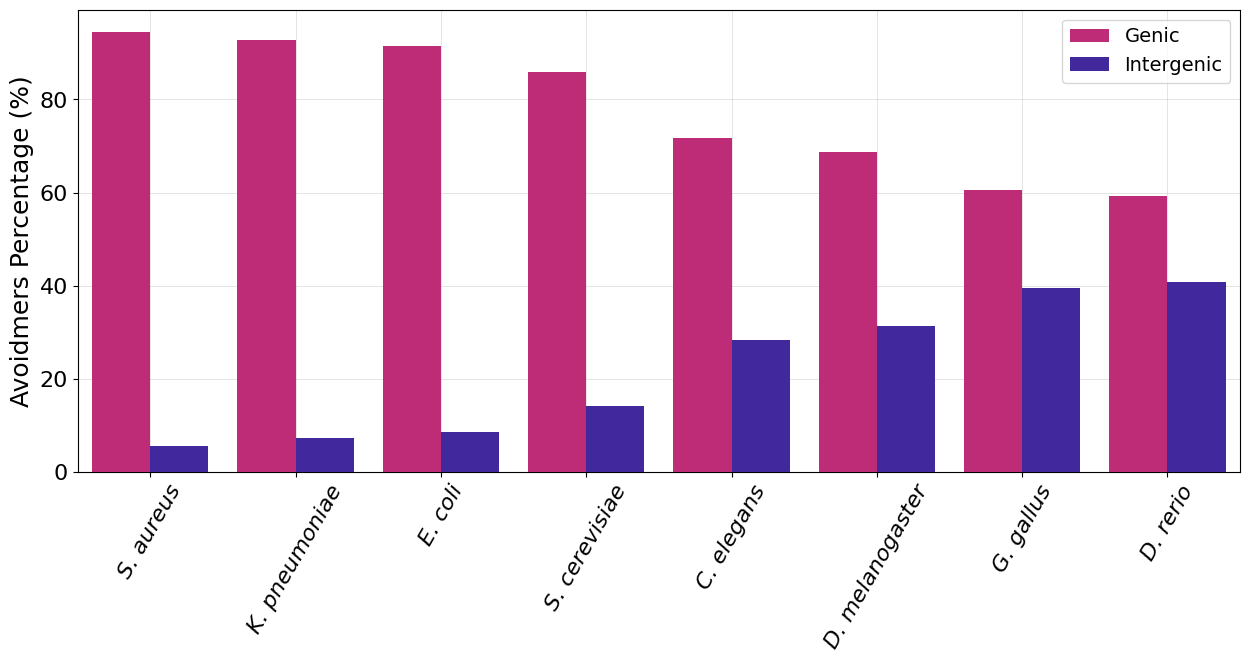

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.barplot(data=value_counts_avoidmers_per_compartment,
            y="density",
            x="organism",
            hue="compartment",
            ax=ax,
            # dodge=False,
            palette={'Genic': '#d61378',
                    'Intergenic': '#3715b0',
                   },
            zorder=3,
            order=value_counts_avoidmers_per_compartment.query("compartment == 'Genic'").sort_values(by=['density'], ascending=False)['organism'].tolist()
           )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_ylabel("Avoidmers Percentage (%)")
ax.yaxis.label.set_size(18)
ax.set_xlabel("")
ax.tick_params(axis="both", labelsize=16)
ax.tick_params(axis="x", rotation=60)
ax.legend(title="", prop={"size": 14})

labels = ax.get_xticklabels()
for l in labels:
    l.set_style('italic')
    
save_location = Path("model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/genic_vs_intergenic_perc_avoidmers_model_organisms.png", bbox_inches='tight')

In [131]:
avoidmers_enriched_all

,seqID,start,end,mergedSequence,length,compartment,geneStart,geneEnd,overlap,organism
0,chr1,19541,19592,ataggatgccatggtttgtaacttcgctattggcattccacgtcgt...,51,Genic,19330,224006,51,galGal6
1,chr1,21188,21238,agccagtgtcactgcagccttcaaaaagggcaagaaggaggatcct...,50,Genic,19330,224006,50,galGal6
2,chr1,22663,22718,ccaacggaaatgccggtctcctgtgttgcaccgtaattcccgggca...,55,Genic,19330,224006,55,galGal6
3,chr1,22743,22803,ggtcgcacttattttcagggtgtaacgagcgtccagttgccctcag...,60,Genic,19330,224006,60,galGal6
4,chr1,22811,22861,gccttggatccagtatttaacgttcacaccgtagagcagccgcttc...,50,Genic,19330,224006,50,galGal6
...,...,...,...,...,...,...,...,...,...,...
12884,NC_016847.1,1516,1566,ttccccttcggaaagttcagcatccttgaagatcttttcaacaata...,50,Genic,1501,2691,50,GCF_000240185.1
12885,NC_016847.1,1695,1748,ttcgaatcactttttcatgtgacgaaacatcttcgtagctgccagg...,53,Genic,1501,2691,53,GCF_000240185.1
12886,NC_016847.1,2958,3014,cctgtttccggcgttcttctcctccgaaaacggtgaacggggacgc...,56,Intergenic,-1,-1,0,GCF_000240185.1
12887,NC_016847.1,3038,3112,agccggaaaaccggttttcagcacgttcaggaatcgggttcgtcga...,74,Intergenic,-1,-1,0,GCF_000240185.1


In [136]:
!ls

Avoidmer_Model_Organisms.ipynb
Avoidmers_Biophysical.ipynb
Avoidmers-Copy1.ipynb
AvoidmersDensity-Copy1.ipynb
AvoidmersDensity.ipynb
Avoidmers-Density-Plots.ipynb
Avoidmers.ipynb
f
fasta_1mers
fasta_1mers.tar.gz
galGal6_abacaba_words_length_50.extended.maximal.txt
genome_sizes.txt
gff
gff.tar
model_organisms
pattern_maximal_abacaba
pattern_merged_abacaba
replication_time.ipynb
ReplicationTiming.ipynb
SF.ipynb
Zimin_Avoiding_probabilities.ipynb


In [174]:
from collections import defaultdict

densities = defaultdict(list)

for length in tqdm(range(50, 101), total=51):
    temp = avoidmers_enriched_maximal[avoidmers_enriched_maximal['length'] >= length]
    value_counts_avoidmers = temp.groupby(["organism"], as_index=False).agg(totalCounts=("overlap", "count"))
    value_counts_avoidmers_per_compartment = temp.groupby(["organism", "compartment"], as_index=False)\
                                                                   .agg(counts=("overlap", "count"))\
                                                .merge(value_counts_avoidmers, on="organism", how="left")\
                                                .assign(density=lambda ds: 1e2 * ds['counts'].div(ds['totalCounts']))
    
    value_counts_avoidmers_per_compartment.loc[:, "organism"] = value_counts_avoidmers_per_compartment['organism'].apply(lambda x: x.split('.')[0] if "GC" not in x else x).map(organism_names_all)

    for _, row in value_counts_avoidmers_per_compartment.iterrows():
        organism = row['organism']
        compartment = row['compartment']
        density = float(row['density'])

        densities['organism'].append(organism)
        densities['compartment'].append(compartment)
        densities['density'].append(density)
        densities['length'].append(length)

densities = pd.DataFrame(densities)
densities

100%|███████████████████████████████████████████| 51/51 [00:05<00:00,  9.79it/s]


,organism,compartment,density,length
0,E. coli,Genic,91.440356,50
1,E. coli,Intergenic,8.559644,50
2,S. aureus,Genic,94.960317,50
3,S. aureus,Intergenic,5.039683,50
4,K. pneumoniae,Genic,92.367216,50
...,...,...,...,...
721,D. rerio,Intergenic,100.000000,100
722,D. melanogaster,Genic,75.000000,100
723,D. melanogaster,Intergenic,25.000000,100
724,G. gallus,Genic,100.000000,100


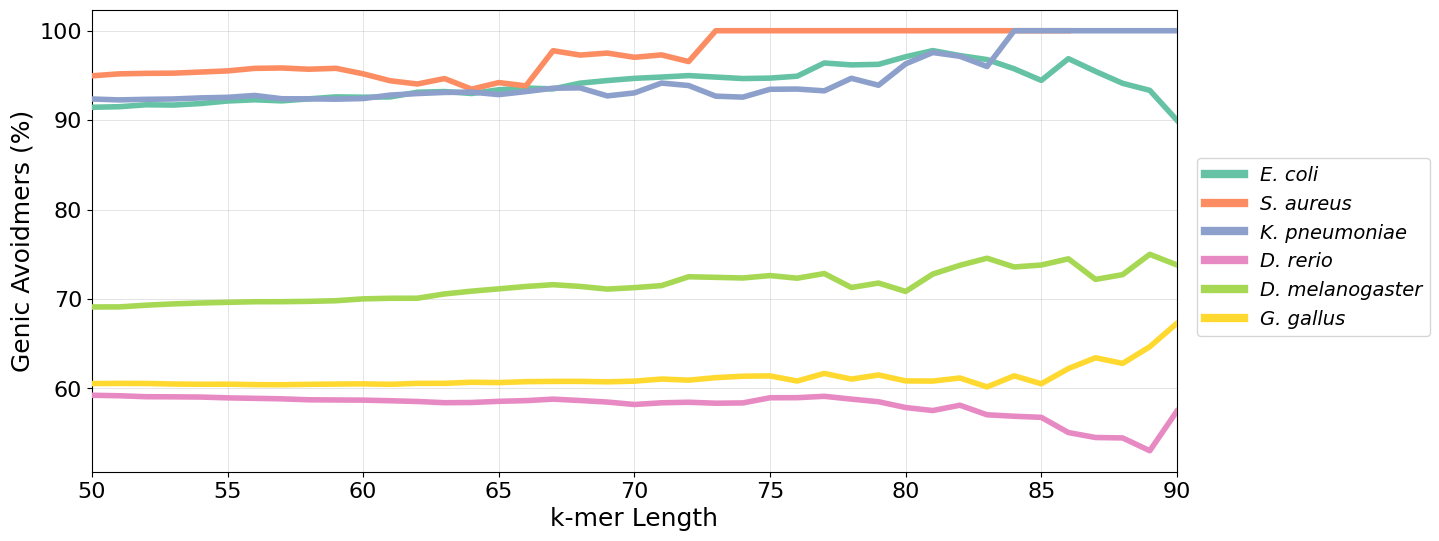

In [175]:
import copy

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

genic_percentage = densities[densities['compartment'] == 'Genic'].query("length <= 90")
sns.lineplot(data=genic_percentage, x="length",
                             y="density",
                             hue="organism",
                             ax=ax,
                             zorder=3,
                             lw=4.0,
             palette=sns.color_palette("Set2")
            )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_ylabel("Genic Avoidmers (%)")
ax.yaxis.label.set_size(18)
ax.tick_params(axis="both", labelsize=16)
ax.set_xlabel("k-mer Length")

# get the legend object
# leg = ax.legend()

# change the line width for the legend
# for line in leg.get_lines():
#     line.set_linewidth(4.0)
# ax.legend(title="", prop={"size": 14}, bbox_to_anchor=(1.01, 0.7))
# obtain the handles and labels from the figure
handles, labels = ax.get_legend_handles_labels()
# copy the handles
ax.set_xlim(xmin=50, xmax=90)
handles = [copy.copy(ha) for ha in handles ]
# set the linewidths to the copies
[ha.set_linewidth(6) for ha in handles ]
# put the copies into the legend
leg = plt.legend(handles=handles, prop={"size": 14, 'style': 'italic'}, bbox_to_anchor=(1.01, 0.7), labels=labels)

ax.xaxis.label.set_size(18)
save_location = Path("model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/avoidmers_genic_percentage_vs_length_model_organisms.png", bbox_inches='tight')

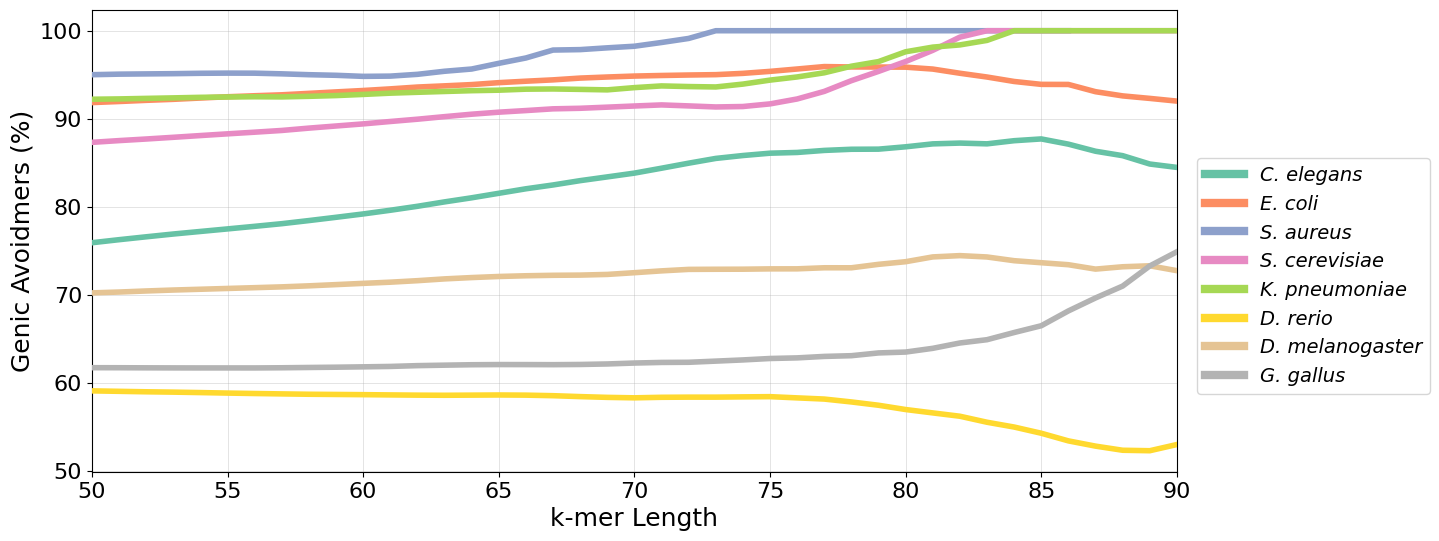

In [429]:
import copy

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

genic_percentage = densities[densities['compartment'] == 'Genic'].query("length <= 90")
sns.lineplot(data=genic_percentage, x="length",
                             y="density",
                             hue="organism",
                             ax=ax,
                             zorder=3,
                             lw=4.0,
             palette=sns.color_palette("Set2")
            )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_ylabel("Genic Avoidmers (%)")
ax.yaxis.label.set_size(18)
ax.tick_params(axis="both", labelsize=16)
ax.set_xlabel("k-mer Length")

# get the legend object
# leg = ax.legend()

# change the line width for the legend
# for line in leg.get_lines():
#     line.set_linewidth(4.0)
# ax.legend(title="", prop={"size": 14}, bbox_to_anchor=(1.01, 0.7))
# obtain the handles and labels from the figure
handles, labels = ax.get_legend_handles_labels()
# copy the handles
ax.set_xlim(xmin=50, xmax=90)
handles = [copy.copy(ha) for ha in handles ]
# set the linewidths to the copies
[ha.set_linewidth(6) for ha in handles ]
# put the copies into the legend
leg = plt.legend(handles=handles, prop={"size": 14, 'style': 'italic'}, bbox_to_anchor=(1.01, 0.7), labels=labels)

ax.xaxis.label.set_size(18)
save_location = Path("/storage/group/izg5139/default/external/zimie/model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/avoidmers_genic_percentage_vs_length_model_organisms.png", bbox_inches='tight')


In [219]:
genic = value_counts_avoidmers_per_compartment.query("compartment == 'Genic'")['totalCounts'].tolist()
intergenic = value_counts_avoidmers_per_compartment.query("compartment == 'Intergenic'")['totalCounts'].tolist()

In [220]:
total_counts_compartment = value_counts_avoidmers_per_compartment['totalCounts'].tolist()
total_counts_compartment

[693532,
 220185,
 138947,
 12359,
 26224,
 1380,
 176199,
 25605,
 102893,
 8690,
 6848886,
 4746567,
 1462038,
 620562,
 3348108,
 2078366]

In [222]:
labels = ['Genic', 'Intergenic'] * (avoidmers_df_maximal['organism'].nunique()-1)
labels

['Genic',
 'Intergenic',
 'Genic',
 'Intergenic',
 'Genic',
 'Intergenic',
 'Genic',
 'Intergenic',
 'Genic',
 'Intergenic',
 'Genic',
 'Intergenic',
 'Genic',
 'Intergenic']

In [223]:
colors_compartments = ['#d61378', '#3715b0'] * (avoidmers_df_maximal['organism'].nunique()-1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


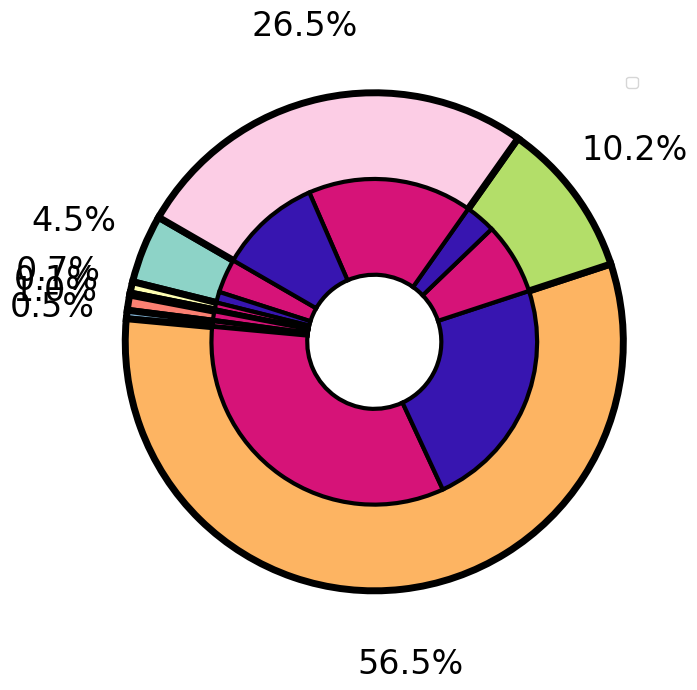

In [226]:
colors = sns.color_palette("Set3") # sns.color_palette("Set3")[2:3]

fig = plot_my_pie(
                  {
                   'Total': total_counts,
                   'labels': labels,
                   'Genic': genic,
                   'Intergenic': intergenic,
                   'colors': colors_compartments
                  }, 
        colors)

# target = figures.joinpath("compartments_coverage")
# target.mkdir(exist_ok=True)
# fig.savefig(target.joinpath(f"{domain}_pieplot_genic_intergenic.png"), bbox_inches='tight')

#fig.savefig(".png", bbox_inches='tight')
plt.show();  

In [225]:
def plot_my_pie(sizes, colors):
    startangle = 150
    total_sizes = sizes['Total']
    labels = sizes['labels']
    labels_compartment = ['Genic', 'Intergenic', 'Genic', 'Intergenic', 'Genic', 'Intergenic', 'Genic', 'Intergenic', 'Genic', 'Intergenic', 'Genic', 'Intergenic'] 
    colors_compartments = ['#d61378', '#3715b0', '#d61378', '#3715b0', '#d61378', '#3715b0', '#d61378', '#3715b0', '#d61378', '#3715b0', '#d61378', '#3715b0']

    # Plot
    size_compartments = []
    for x, y in zip(sizes['Genic'], sizes['Intergenic']):
        size_compartments.extend([x, y])

    plt.figure(figsize=(7, 7))
    patches, texts, autotexts = plt.pie(total_sizes, 
                                        # labels=labels, 
                                        colors=colors, 
                                        counterclock=True, 
                            textprops={'fontsize': 24}, 
                            autopct='%1.1f%%', 
                            radius=1.3,
                            startangle=startangle, 
                            pctdistance=1.3,
                            labeldistance=2,
                            shadow=False, 
                            wedgeprops=dict(width=0.5, edgecolor='black', linewidth=5.0), 
                            frame=True,
                        )
    
    plt.pie(size_compartments, 
            # labels=labels_compartment,
            colors=colors_compartments, 
            counterclock=True,
            # autopct='%1.1f%%', 
            radius=0.85, 
            startangle=startangle, 
            wedgeprops=dict(width=0.5, edgecolor='black', linewidth=3.0), 
           )
    plt.legend()
    centre_circle = plt.Circle((0,0), 0.2, color='black', fc='white', linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
     
    plt.axis('equal')
    plt.tight_layout()
    return fig

chr1	117	aatttagccagaggcgcacaacatacgacctctaaaaaaggtgctgtaac	50	abacaba	67
chr1	367	aaccgtattagtgctgcctggcccagtttggcacaaaatggagcgattccatt	53	abacaba	314
chr1	367	accgtattagtgctgcctggcccagtttggcacaaaatggagcgattccatt	52	abacaba	315
chr1	367	ccgtattagtgctgcctggcccagtttggcacaaaatggagcgattccatt	51	abacaba	316
chr1	367	cgtattagtgctgcctggcccagtttggcacaaaatggagcgattccatt	50	abacaba	317
chr1	371	ttagtgctgcctggcccagtttggcacaaaatggagcgattccattaaga	50	abacaba	321
chr1	659	acgtgtgccctaacctagtcctcatcttcagtcagtaatttgggggccatg	51	abacaba	608
chr1	659	agagctgacgtgtgccctaacctagtcctcatcttcagtcagtaatttgggggccatg	58	abacaba	601
chr1	659	agctgacgtgtgccctaacctagtcctcatcttcagtcagtaatttgggggccatg	56	abacaba	603
chr1	659	cgtgtgccctaacctagtcctcatcttcagtcagtaatttgggggccatg	50	abacaba	609


# Avoidmer Density per Genomic Compartment - Model Organisms

In [66]:
gff_files

NameError: name 'gff_files' is not defined

In [98]:
avoidmers_df_maximal['organism'].unique()

array(['GCF_000008865.2', 'GCF_000013425.1', 'GCF_000240185.1', 'ce11',
       'danRer11', 'dm6', 'galGal6', 'sacCer3'], dtype=object)

In [61]:
additional_gff = chromosome_sizes.copy()
additional_gff.loc[:, "start"] = 1
additional_gff = additional_gff.rename(columns={"chrLen": "end"})
additional_gff.loc[:, "compartment"] = "region"
additional_gff

NameError: name 'chromosome_sizes' is not defined

In [62]:
mapping

NameError: name 'mapping' is not defined

In [63]:
additional_gff.query("organism == 'ce11'")

NameError: name 'additional_gff' is not defined

In [64]:
from tqdm import tqdm
avoidmers_coverage_all = []

for organism, gff_path in tqdm(gff_files.items(), leave=True, total=len(gff_files)):
    gff_path = Path(gff_path)
    # print(organism)

    if "CHM13v2" in gff_path.name:
        continue
    
    if organism == "GCF_000002985.6":
        organism_ = "ce11"
    elif organism == "GCF_000146045.2":
        organism_ = "sacCer3"
    else:
        organism_ = organism.split('.')[0] if "GC" not in organism else organism

    if organism_ == "sacCer3" or organism_ == "ce11":
        mapping = chromosome_map[organism_]
        
    gff_df = pd.read_table(gff_path, 
                           comment="#", 
                           header=None, 
                           names=["seqID", "compartment", "start", "end"],
                          usecols=[0, 2, 3, 4],
                           dtype={"start": int, "end": int}
                          )

    valid_compartments = {"transcript", "region", "CDS", "exon", "gene", "pseudogene"}
    gff_df = gff_df[gff_df["compartment"].isin(valid_compartments)]
    gff_df["compartment"] = gff_df["compartment"].replace("pseudogene", "gene").replace("transcript", "gene")
    merged_gff = []

    obtained_compartments = gff_df["compartment"].unique()

    if "region" not in obtained_compartments:
        additional_temp = additional_gff[additional_gff["organism"] == organism_].drop(columns=['organism'])
        if organism_ == "sacCer3" or organism_ == "ce11":
            additional_temp.loc[:, "seqID"] = additional_temp["seqID"].apply(lambda y: mapping[y.split("r")[1]])
            
        gff_df = pd.concat([gff_df, additional_temp], axis=0)
    
    gff_df.loc[:, "start"] = gff_df["start"] - 1
    for compartment in gff_df["compartment"].unique():
        temp = gff_df[gff_df["compartment"] == compartment]
        
        temp_gff = pd.read_table(
            BedTool.from_dataframe(temp[["seqID", "start", "end"]]).sort().merge().fn,
            header=None,
            names=["seqID", "start", "end"]
        )
        temp_gff.loc[:, "compartment"] = compartment
        merged_gff.append(temp_gff)

    
    merged_gff = pd.concat(merged_gff, axis=0)
    merged_gff_bed = BedTool.from_dataframe(merged_gff).sort()
    avoidmers = avoidmers_df_maximal[avoidmers_df_maximal['organism'] == organism_][["seqID", "start", "end", "sequence", "length", "type"]]
    
    if organism_ == "sacCer3" or organism_ == "ce11":
        avoidmers.loc[:, "seqID"] = avoidmers["seqID"].apply(lambda y: mapping[y.split("r")[1]])
        
    avoidmers_bed = BedTool.from_dataframe(avoidmers)
    avoidmers_coverage = pd.read_table(
                        merged_gff_bed.coverage(avoidmers_bed).fn,
                        header=None,
                        names=list(merged_gff.columns) + ["totalHits", "overlappingBp", "compartmentLength", "coverage"]
                        )
    avoidmers_coverage.loc[:, "coverage"] = 1e6 * avoidmers_coverage["coverage"]
    avoidmers_coverage.loc[:, "compartment"] = avoidmers_coverage["compartment"].replace("gene", "Gene")\
                                                                                .replace("exon", "Exon")\
                                                                                .replace("region", "Genome")
    avoidmers_coverage.loc[:, "organism"] = organism_
    avoidmers_coverage_all.append(avoidmers_coverage)
    
avoidmers_coverage_all = pd.concat(avoidmers_coverage_all, axis=0)
avoidmers_coverage_all

NameError: name 'gff_files' is not defined

In [65]:
avoidmers_coverage_all.isna().sum()

AttributeError: 'list' object has no attribute 'isna'

In [306]:
organism_names_all

{'ce11': 'C. elegans',
 'sacCer3': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_000002985.6': 'C. elegans'}

In [302]:
avoidmers_coverage_all['organism'].unique()

array(['danRer11', 'galGal6', 'dm6', 'ce11', 'GCF_000008865.2',
       'GCF_000013425.1', 'sacCer3', 'GCF_000240185.1'], dtype=object)

In [471]:
organism_names_all.update({"GCF_000146045.2": "S. cerevisiae",
                           "GCF_000002985.6": "C. elegans"
                          })
organism_names_all

{'ce11': 'C. elegans',
 'sacCer3': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_000002985.6': 'C. elegans'}

In [309]:
avoidmers_coverage_all.loc[:, "name"] = avoidmers_coverage_all['organism'].apply(lambda x: x.split('.')[0] if "GC" not in x else x).map(organism_names_all)
avoidmers_coverage_all

,seqID,start,end,compartment,totalHits,overlappingBp,compartmentLength,coverage,organism,name
0,chr1,0,59578282,Genome,412078,3408982,59578282,57218.5,danRer11,D. rerio
1,chr1,6641,11878,Gene,29,351,5237,67023.1,danRer11,D. rerio
2,chr1,6641,6760,Exon,0,0,119,0.0,danRer11,D. rerio
3,chr1,6682,6760,CDS,0,0,78,0.0,danRer11,D. rerio
4,chr1,6891,6955,CDS,0,0,64,0.0,danRer11,D. rerio
...,...,...,...,...,...,...,...,...,...,...
14111,NC_016847.1,152,1139,Exon,11,109,987,110435.7,GCF_000240185.1,K. pneumoniae
14112,NC_016847.1,152,1139,CDS,11,109,987,110435.7,GCF_000240185.1,K. pneumoniae
14113,NC_016847.1,1501,2691,Gene,5,103,1190,86554.6,GCF_000240185.1,K. pneumoniae
14114,NC_016847.1,1501,2691,Exon,5,103,1190,86554.6,GCF_000240185.1,K. pneumoniae


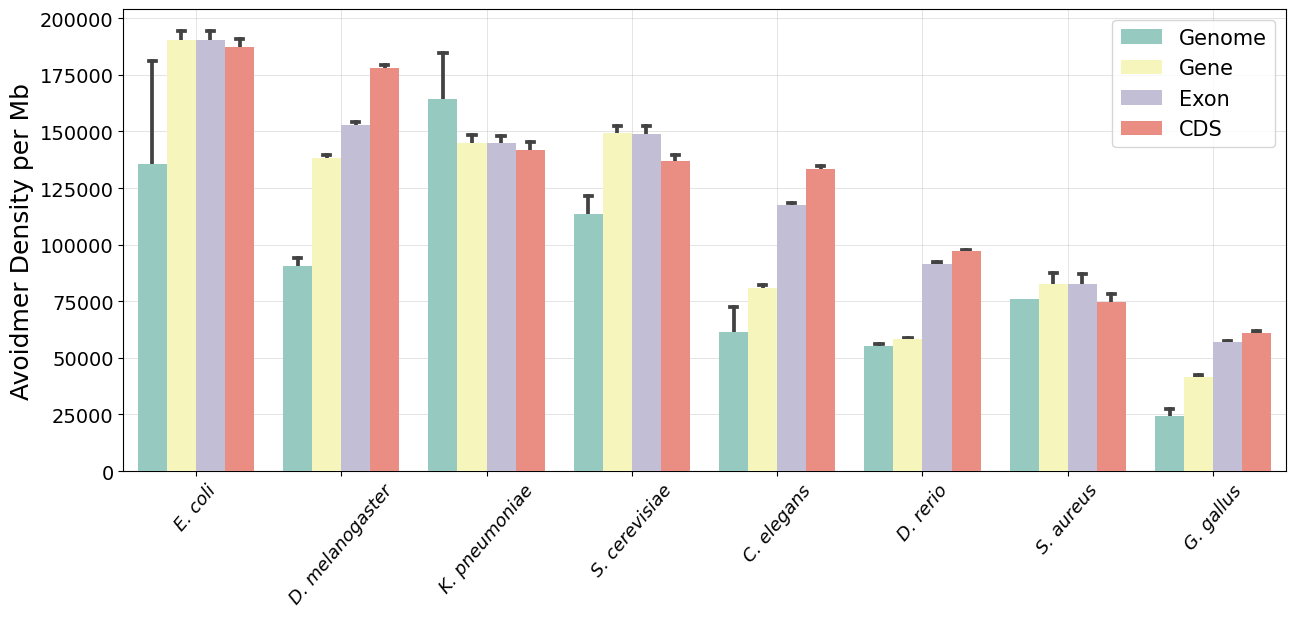

In [310]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.barplot(data=avoidmers_coverage_all, 
            x="name",
            y="coverage",
            dodge=True,
            width=0.8,
            hue="compartment",
            palette="Set3",
            ax=ax,
            capsize=.05,
           zorder=3,
           order=avoidmers_coverage_all[avoidmers_coverage_all['compartment'] == 'CDS'].groupby("name").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False).index.tolist()
           )

labels = ax.get_xticklabels()
for l in labels:
    l.set_style('italic')
    
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=13, rotation=50)
ax.legend(loc=0, title="")
ax.set_ylabel("Avoidmer Density per Mb")
ax.set_xlabel("")
ax.yaxis.label.set_size(18)
ax.legend(prop={"size": 15})

save_location = Path("/storage/group/izg5139/default/external/zimie/model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/density_avoidmers_model_organisms.png", bbox_inches='tight')

In [ ]:
df = dd.read_csv("/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/*.maximum_zimin.txt").
df

In [ ]:
df_centro = pd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/centromeres/chm13v2.0_censat_v2.0.bed", 
                          usecols=range(4), 
                          skiprows=1, 
                          header=None, 
                          names=["seqID", "start", "end", "compartment"]
                         )
df_centro.loc[:, "compartment"] = df_centro["compartment"].str.split("_", expand=True)[0]

chrSizes = dd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/chrSizes/chromosome_prim*.txt").compute()
chrSizes.loc[:, "#assembly_accession"] = chrSizes["#assembly_accession"].apply(lambda y: '.'.join(y.split('.')[:2]))

chromosomes = chrSizes[chrSizes['#assembly_accession'] == 'chm13v2.0']\
                .drop(columns=["#assembly_accession"])

df_centro = df_centro.merge(chromosomes, how="left", left_on="seqID", right_on="chromosome")

In [ ]:
df_centro_hsat3 = df_centro[df_centro["compartment"] == "hsat3"]
df_centro_hsat3

In [ ]:
path = Path("/storage/group/izg5139/default/DNA-Avoidmers/scripts")

files = [f for f in path.glob("*") if "enrichment" in f.name and "length_3" in f.name]
files

In [ ]:
df.iloc[0]

In [ ]:
homo_sapiens = pd.read_csv("/storage/group/izg5139/default/DNA-Avoidmers/scripts/chm13v2.0_enrichment_analysis_length_3.txt", header=None)
homo_sapiens

In [ ]:
homo_sapiens = homo_sapiens.rename(columns={
                                            1: 'seqID', 
                                            2: 'start', 
                                            3: 'end'
                                           }
                                )
homo_sapiens.drop(columns=[0], inplace=True)
homo_sapiens

In [ ]:
import pybedtools
from pybedtools import BedTool
pybedtools.set_tempdir("/storage/home/nmc6088/scratch")

In [ ]:
df_centro_hsat3_bed = BedTool.from_dataframe(df_centro_hsat3[["seqID", "start", "end"]])

In [ ]:
homo_sapiens_bed = BedTool.from_dataframe(homo_sapiens[["seqID", "start", "end"]])

In [ ]:
intersect = pd.read_table( (homo_sapiens_bed.intersect(df_centro_hsat3_bed, wo=True)).fn, 
                          header=None, 
                          names=["seqID", "start", "end", "chromosome", "comp_start", "comp_end", "overlap"])
intersect

In [ ]:
df = pd.read_csv("/storage/group/izg5139/default/DNA-Avoidmers/scripts/chm13v2.0_enrichment_analysis_length_3.txt", 
                 header=None,
            )
df

In [ ]:
df = pd.read_csv("/storage/group/izg5139/default/DNA-Avoidmers/scripts/chm13v2.0_enrichment_analysis_length_3.txt", 
                 header=None,
            )
df = df[df[1] == "chrY"]
# .drop(columns=[0, 1, 2, 3, 4])
df.loc[:, "length"] = df[3] - df[2]
df.drop(columns=[0, 1, 2, 3, 4], inplace=True)
df = df.apply(lambda row: row/(row['length']-2), axis=1)
df.drop(columns=["length"], inplace=True)
sum = df.sum()
mean = sum.mean()
sum = sum / mean
plt.grid(lw=0.4, alpha=0.6)
plt.title(file.name.split("_enrichment")[0])
plt.plot(range(len(sum)), sum)
plt.show()
plt.close()

In [ ]:
1004 - 5

In [ ]:
df.rename(columns={i: int(i)-505 for i in range(5, 1009)})

In [ ]:
for file in files:
    df = pd.read_csv(file, header=None)
    break
    # break
    # .drop(columns=[0, 1, 2, 3, 4])
    df.loc[:, "length"] = df[3] - df[2]
    df.drop(columns=[0, 1, 2, 3, 4], inplace=True)
    df = df.rename(columns={i: int(i)-505 for i in range(5, 1004)})
    df = df.apply(lambda row: row/(row['length']-2), axis=1)
    df.drop(columns=["length"], inplace=True)
    sum = df.sum()
    mean = sum.mean()
    sum = sum / mean
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.grid(lw=0.4, alpha=0.6)
    # ax.set_title(file.name.split("_enrichment")[0])
    # ax.set_xticks(range(1001), [str(int(i)-500) if i%200==0 else "" for i in range(1001)])
    ax.plot(range(len(sum)), sum, lw=3.0, color='gray', alpha=1.0)
    ax.tick_params(axis="both", labelsize=15)
    ax.set_ylabel("Enrichment")
    ax.yaxis.label.set_size(16)
    ax.axvline(0.0, linestyle='--', color='red', lw=2.0)
    plt.show()
    plt.close()
    fig.savefig(f"/storage/group/izg5139/default/external/zimie/zimie_enrichment_{file.name.split('_enrichment')[0]}.png", bbox_inches='tight')
    break

In [ ]:
sum

In [ ]:
for file in files:
    df = pd.read_csv(file, 
                     header=None,
                ).drop(columns=[0, 1, 2, 3, 4])
    sum = df.sum()
    mean = sum.mean()
    sum = sum / mean
    plt.grid(lw=0.4, alpha=0.6)
    plt.title(file.name.split("_enrichment")[0])
    plt.plot(range(len(sum)), sum)
    plt.show()
    plt.close()
    

In [ ]:
sum = df.sum()
sum

In [ ]:
sum = df.sum()
mean = sum.mean()
sum = sum / mean
plt.plot(range(len(sum)), sum)

In [ ]:
dataset = {}

with open("/storage/group/izg5139/default/DNA-Avoidmers/scripts/GCF_000008865.2_complexity_analysis_length_4_bin_2000.txt") as f:
    for line in f:
        line = line.strip()

        enrichment = list(map(int, line.split(",")[5:]))
        total = len(enrichment)
        break
# enrichment
line

In [ ]:
plt.plot(range(len(enrichment)), enrichment)

In [ ]:
zimie = {f.name.split("_")[4]: f for f in Path("/storage/group/izg5139/default/external/satellites/primates/zimie_counts").glob("*.json")}
zimie

In [ ]:
import pandas as pd
import math

df_all = []
for seqID in zimie:
    df = pd.read_json(zimie[seqID], typ="series").to_frame(name="avoidmers").reset_index().rename(columns={"index": "length"})
    df.loc[:, "seqID"] = seqID
    df_all.append(df)

df_all = pd.concat(df_all, axis=0)
df_all

In [ ]:
df_all[df_all["length"] > 60]['length'].max()

In [ ]:
!ls /storage/group/izg5139/default/DNA-Avoidmers/patterns

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
df_all.groupby("length").agg(total=("avoidmers", "sum")).plot(ax=ax, color='black', zorder=3, lw=2.0)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_ylabel("Avoidmer Occurrences")
ax.yaxis.label.set_size(18)
ax.set_xlabel("k-mer Length")
ax.xaxis.label.set_size(18)
ax.legend(handles=[], frameon=False)

ax.tick_params(axis="both", labelsize=16)
fig.savefig("", bbox_inches='tight')

save_location = Path("/storage/group/izg5139/default/external/zimie")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/avoidmer_occurrences_total.png", bbox_inches='tight')

In [ ]:
model_organisms = [f for f in Path("/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba")\
                                       .glob("*.all_seqs.txt")]
model_organisms

In [ ]:
df = pd.read_csv("/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.all_seqs.txt")
df

In [ ]:
import pandas as pd
import math

df_all = []
for seqID in zimie:
    df = pd.read_json(zimie[seqID], typ="series").to_frame(name="avoidmers").reset_index().rename(columns={"index": "length"})
    df.loc[:, "seqID"] = seqID
    df_all.append(df)

df_all = pd.concat(df_all, axis=0).query("length >= 30").pivot(columns="seqID", index="length", values="avoidmers").fillna(0.0)
for col in df_all:
    df_all[col] = df_all[col].apply(lambda x: math.log(x+1, 10))
df_all

In [ ]:
f"{save_location}/avoidmer_log_occurrences_chromosome_breakdown.png"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,  ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 26))

sns.heatmap(
    data=df_all,
    ax=ax,
    cmap="winter",
     cbar_kws={'label': 'log10(Occurrences)'}
)
ax.tick_params(axis="both", labelsize=18)
ax.tick_params(axis="x", rotation=25)
ax.tick_params(axis="y", rotation=0)
ax.set_ylabel("")
ax.set_xlabel("Avoidmer Length")
ax.xaxis.label.set_size(20)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=16)
cax.figure.axes[-1].yaxis.label.set_size(20)

save_location = Path("/storage/group/izg5139/default/external/zimie")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/avoidmer_log_occurrences_chromosome_breakdown.png", bbox_inches='tight')

In [ ]:
from pathlib import Path
import pandas as pd

In [ ]:
df = pd.read_table("/storage/group/izg5139/default/external/satellites/primates/jelly_extractions/homo_sapiens.fasta_2mers.dumped")
df

In [334]:
jellymers = {int(f.name.split(".fasta_")[1].split("mers")[0]): f for f in Path("/storage/group/izg5139/default/external/satellites/primates/jelly_extractions").glob("*.dumped")}
jellymers

{10: PosixPath('/storage/group/izg5139/default/external/satellites/primates/jelly_extractions/homo_sapiens.fasta_10mers.dumped'),
 11: PosixPath('/storage/group/izg5139/default/external/satellites/primates/jelly_extractions/homo_sapiens.fasta_11mers.dumped'),
 12: PosixPath('/storage/group/izg5139/default/external/satellites/primates/jelly_extractions/homo_sapiens.fasta_12mers.dumped'),
 13: PosixPath('/storage/group/izg5139/default/external/satellites/primates/jelly_extractions/homo_sapiens.fasta_13mers.dumped'),
 14: PosixPath('/storage/group/izg5139/default/external/satellites/primates/jelly_extractions/homo_sapiens.fasta_14mers.dumped'),
 2: PosixPath('/storage/group/izg5139/default/external/satellites/primates/jelly_extractions/homo_sapiens.fasta_2mers.dumped'),
 3: PosixPath('/storage/group/izg5139/default/external/satellites/primates/jelly_extractions/homo_sapiens.fasta_3mers.dumped'),
 4: PosixPath('/storage/group/izg5139/default/external/satellites/primates/jelly_extractions/h

In [329]:
avoidmers = {("zimin", int(f.name.split("_")[-1].split(".")[0])): f for f in Path("/storage/group/izg5139/default/external/satellites/primates/SF_zimin").glob("*.txt") if "zimin" in f.name}
avoidmers = avoidmers | {("abamer", int(f.name.split("_")[-1].split(".")[0])): f for f in Path("/storage/group/izg5139/default/external/satellites/primates/SF_zimin").glob("*.txt") if "aba"in f.name}
avoidmers

{('zimin',
  10): PosixPath('/storage/group/izg5139/default/external/satellites/primates/SF_zimin/zimin_avoiding_length_10.txt'),
 ('zimin',
  11): PosixPath('/storage/group/izg5139/default/external/satellites/primates/SF_zimin/zimin_avoiding_length_11.txt'),
 ('zimin',
  12): PosixPath('/storage/group/izg5139/default/external/satellites/primates/SF_zimin/zimin_avoiding_length_12.txt'),
 ('zimin',
  13): PosixPath('/storage/group/izg5139/default/external/satellites/primates/SF_zimin/zimin_avoiding_length_13.txt'),
 ('zimin',
  14): PosixPath('/storage/group/izg5139/default/external/satellites/primates/SF_zimin/zimin_avoiding_length_14.txt'),
 ('zimin',
  2): PosixPath('/storage/group/izg5139/default/external/satellites/primates/SF_zimin/zimin_avoiding_length_2.txt'),
 ('zimin',
  3): PosixPath('/storage/group/izg5139/default/external/satellites/primates/SF_zimin/zimin_avoiding_length_3.txt'),
 ('zimin',
  4): PosixPath('/storage/group/izg5139/default/external/satellites/primates/SF_zim

In [335]:
def read_avoidmers(length, level=3):
    global avoidmers

    if level == 3:
        path = avoidmers["zimin", length]
        print(f"Loading zimin level {level} (abacaba).")
    elif level == 2:
        path = avoidmers["abamer", length]
        print(f"Loading zimin level {level} (aba).")
    else:
        raise ValueError(f"Invalid level {level}. Must be either 2 or 3.")
        
    aavoidmers = set()
    with open(path, mode="r") as f:
        for line in f:
            line = line.strip()
            aavoidmers.add(line)

    return aavoidmers
    df = pd.DataFrame(kmer, columns=["kmer"])
    return df

read_avoidmers(2)

Loading zimin level 3 (abacaba).


{'aa',
 'ac',
 'ag',
 'at',
 'ca',
 'cc',
 'cg',
 'ct',
 'ga',
 'gc',
 'gg',
 'gt',
 'ta',
 'tc',
 'tg',
 'tt'}

In [336]:
kmer_length = 10
jelly_df = pd.read_csv(
                       jellymers[kmer_length],
                       delimiter=" ",
                       header=None,
                       names=["kmer", "occurrences"]
                      )
jelly_df.loc[:, "kmer"] = jelly_df["kmer"].str.lower()
jelly_df

,kmer,occurrences
0,aaaaaaaaaa,6012890
1,aaaaaaaaac,239555
2,aaaaaaaaag,631074
3,aaaaaaaaat,470114
4,aaaaaaaaca,164956
...,...,...
524795,ttttccaaaa,43061
524796,ttttcgaaaa,1128
524797,ttttgaaaaa,70372
524798,ttttgcaaaa,13851


In [332]:
jelly_df.loc[jelly_df["kmer"].isin(read_avoidmers(kmer_length)), "type"] = "avoidmer"
jelly_df["type"] = jelly_df["type"].replace("nan", "zimin")
jelly_df

NameError: name 'jelly_df' is not defined

In [333]:
total_kmers = jelly_df["occurrences"].sum()

grouped_type = jelly_df.groupby("type")\
                      .agg({"occurrences": lambda ds: ds.sum() / total_kmers})
grouped_type

NameError: name 'jelly_df' is not defined

# ABA Probabilities

In [337]:
from tqdm import tqdm
from collections import defaultdict 

probabilities = defaultdict(list)
level = 2
for kmer_length in tqdm(range(2, 10), total=12):
    jelly_df = pd.read_csv(
                           jellymers[kmer_length],
                           delimiter=" ",
                           header=None,
                           names=["kmer", "occurrences"]
                          )
    jelly_df.loc[:, "kmer"] = jelly_df["kmer"].str.lower()
    total_occurrences = jelly_df["occurrences"].sum()

    theoretical_avoidmers = read_avoidmers(kmer_length, level=level)
    total_theoretical_avoidmers = len(theoretical_avoidmers)
    probability_for_avoidmer = total_theoretical_avoidmers / 4 ** kmer_length
    
    jelly_df = jelly_df[jelly_df["kmer"].isin(theoretical_avoidmers)]
    total_avoidmers = jelly_df["occurrences"].sum()

    probabilities["length"].append(kmer_length)
    probabilities["observed_probability"].append(total_avoidmers / total_occurrences)
    probabilities["probability"].append(probability_for_avoidmer)

probabilities_df_aba = pd.DataFrame(probabilities)
probabilities_df_aba

 67%|██████▋   | 8/12 [00:00<00:00, 62.30it/s]

Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).


,length,observed_probability,probability
0,2,1.000000,1.000000
1,3,0.706518,0.750000
2,4,0.380417,0.421875
3,5,0.143684,0.164062
4,6,0.032955,0.041016
5,7,0.004594,0.005859
6,8,0.000260,0.000366
7,9,0.000000,0.000000


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

sns.lineplot(data=probabilities_df_aba, x="length", y="probability", lw=2.0, linestyle='--', marker='o', markersize=7, color='crimson', label='Expected', ax=ax, zorder=0)
sns.lineplot(data=probabilities_df_aba, x="length", y="observed_probability", lw=2.0, color='black', label='CHM13v2 T2T', ax=ax, zorder=0)

ax.grid(lw=0.4, alpha=0.6, zorder=3)
ax.set_xlabel("k-mer Length")
ax.xaxis.label.set_size(20)

ax.set_ylabel("ABA Avoiding Probability")
ax.yaxis.label.set_size(20)

ax.tick_params(axis="both", labelsize=14)
ax.set_axisbelow(True)


save_location = Path("/storage/group/izg5139/default/external/zimie")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/aba_avoiding_expected_vs_observed.png", bbox_inches='tight')

# ABACABA Probabilities

In [ ]:
# read_avoidmers(3)

In [ ]:
!ls /storage/group/izg5139/default/DNA-Avoidmers/jelly/ce11

In [338]:
import os

indirs = os.listdir("/storage/group/izg5139/default/DNA-Avoidmers/jelly")
indirs

['GCF_000008865.2',
 'GCF_000013425.1',
 'GCF_000240185.1',
 'ce11',
 'chm13v2.0',
 'chm13v2.0.shuffled',
 'danRer11',
 'dm6',
 'galGal6',
 'sacCer3']

In [339]:
from tqdm import tqdm
from collections import defaultdict 

probabilities = defaultdict(list)

for indir in tqdm(indirs, leave=True):
    target = Path("/storage/group/izg5139/default/DNA-Avoidmers/jelly").joinpath(indir)
    jellyfiles = [f for f in target.glob("*.dumped")]

    for f in jellyfiles:
        kmer_length = int(f.name.split("_")[-1].split("mers")[0])
        # print(kmer_length)
        if kmer_length == 1:
            continue
            
        jelly_df = pd.read_csv(f, 
                               delimiter=" ", 
                               header=None, 
                               names=["kmer", "occurrences"]
                              )
        jelly_df.loc[:, "kmer"] = jelly_df["kmer"].str.lower()
        total_occurrences = jelly_df["occurrences"].sum()
        theoretical_avoidmers = read_avoidmers(kmer_length)
        total_theoretical_avoidmers = len(theoretical_avoidmers)
        probability_for_avoidmer = total_theoretical_avoidmers / 4 ** kmer_length
    
        jelly_df = jelly_df[jelly_df["kmer"].isin(theoretical_avoidmers)]
        total_avoidmers = jelly_df["occurrences"].sum()

        probabilities["organism"].append(indir)
        probabilities["length"].append(kmer_length)
        probabilities["observed_probability"].append(total_avoidmers / total_occurrences)
        probabilities["probability"].append(probability_for_avoidmer)
        
    probabilities_df_abacaba = pd.DataFrame(probabilities)
    probabilities_df_abacaba
    
probabilities_df_abacaba

  0%|          | 0/10 [00:00<?, ?it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 10%|█         | 1/10 [00:31<04:39, 31.04s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 20%|██        | 2/10 [00:59<03:54, 29.30s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 30%|███       | 3/10 [01:29<03:29, 29.89s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 40%|████      | 4/10 [02:10<03:25, 34.31s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 50%|█████     | 5/10 [02:54<03:07, 37.57s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 60%|██████    | 6/10 [03:38<02:39, 39.75s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 70%|███████   | 7/10 [04:21<02:02, 40.96s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 80%|████████  | 8/10 [05:05<01:23, 41.88s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 90%|█████████ | 9/10 [05:48<00:42, 42.37s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


100%|██████████| 10/10 [06:23<00:00, 38.34s/it]

Loading zimin level 3 (abacaba).


,organism,length,observed_probability,probability
0,GCF_000008865.2,10,0.961337,0.965069
1,GCF_000008865.2,11,0.942871,0.948469
2,GCF_000008865.2,12,0.920851,0.929011
3,GCF_000008865.2,2,1.000000,1.000000
4,GCF_000008865.2,3,1.000000,1.000000
...,...,...,...,...
105,sacCer3,5,1.000000,1.000000
106,sacCer3,6,1.000000,1.000000
107,sacCer3,7,0.990533,0.996094
108,sacCer3,8,0.978299,0.988953


In [472]:
organism_names_all = {
                   'GCF_000002985.6': 'C. elegans',
                   'GCF_000146045.2': 'S. cerevisiae',
                   'GCF_009914755.1': 'H. sapiens',
                   'dm6': 'D. melanogaster',
                    'galGal6': 'G. gallus',
                    'danRer11': 'D. rerio',
                    'GCF_000013425.1': 'S. aureus',
                    'GCF_000240185.1': 'K. pneumoniae',
                    'GCF_000008865.2': 'E. coli',
                  "ce11": "C. elegans",
                  "sacCer3": "S. cerevisiae",
                  "chm13v2.0": "H. sapiens"
                 
                  }


In [347]:
probabilities_df_abacaba.loc[:, "organism_name"] = probabilities_df_abacaba["organism"].map(organism_names_all)
probabilities_df_abacaba

,organism,length,observed_probability,probability,organism_name
0,GCF_000008865.2,10,0.961337,0.965069,E. coli
1,GCF_000008865.2,11,0.942871,0.948469,E. coli
2,GCF_000008865.2,12,0.920851,0.929011,E. coli
3,GCF_000008865.2,2,1.000000,1.000000,E. coli
4,GCF_000008865.2,3,1.000000,1.000000,E. coli
...,...,...,...,...,...
105,sacCer3,5,1.000000,1.000000,S. cerevisiae
106,sacCer3,6,1.000000,1.000000,S. cerevisiae
107,sacCer3,7,0.990533,0.996094,S. cerevisiae
108,sacCer3,8,0.978299,0.988953,S. cerevisiae


In [348]:
probabilities_df_abacaba[probabilities_df_abacaba['organism_name'].isna()]

,organism,length,observed_probability,probability,organism_name
55,chm13v2.0.shuffled,10,0.955491,0.965069,NaN
56,chm13v2.0.shuffled,11,0.935210,0.948469,NaN
57,chm13v2.0.shuffled,12,0.911712,0.929011,NaN
58,chm13v2.0.shuffled,2,1.000000,1.000000,NaN
59,chm13v2.0.shuffled,3,1.000000,1.000000,NaN
60,chm13v2.0.shuffled,4,1.000000,1.000000,NaN
61,chm13v2.0.shuffled,5,1.000000,1.000000,NaN
62,chm13v2.0.shuffled,6,1.000000,1.000000,NaN
63,chm13v2.0.shuffled,7,0.994434,0.996094,NaN
64,chm13v2.0.shuffled,8,0.985236,0.988953,NaN


In [349]:
pivot_table = probabilities_df_abacaba.dropna().pivot(values="observed_probability", columns="length", index="organism_name").loc[:, 6:]
pivot_table

length,6,7,8,9,10,11,12
organism_name,,,,,,,
C. elegans,1.0,0.986855,0.972217,0.951941,0.925496,0.894066,0.857857
D. melanogaster,1.0,0.986712,0.971560,0.950377,0.923108,0.893276,0.859970
D. rerio,1.0,0.973390,0.952663,0.927757,0.897454,0.864791,0.828180
E. coli,1.0,0.995992,0.988635,0.976943,0.961337,0.942871,0.920851
G. gallus,1.0,0.987540,0.971833,0.951114,0.925695,0.896707,0.863934
H. sapiens,1.0,0.983842,0.965715,0.941962,0.913206,0.881069,0.845765
K. pneumoniae,1.0,0.995972,0.987700,0.974236,0.955682,0.934265,0.908910
S. aureus,1.0,0.993228,0.981717,0.964148,0.941297,0.914742,0.883471
S. cerevisiae,1.0,0.990533,0.978299,0.960781,0.938173,0.912939,0.883985


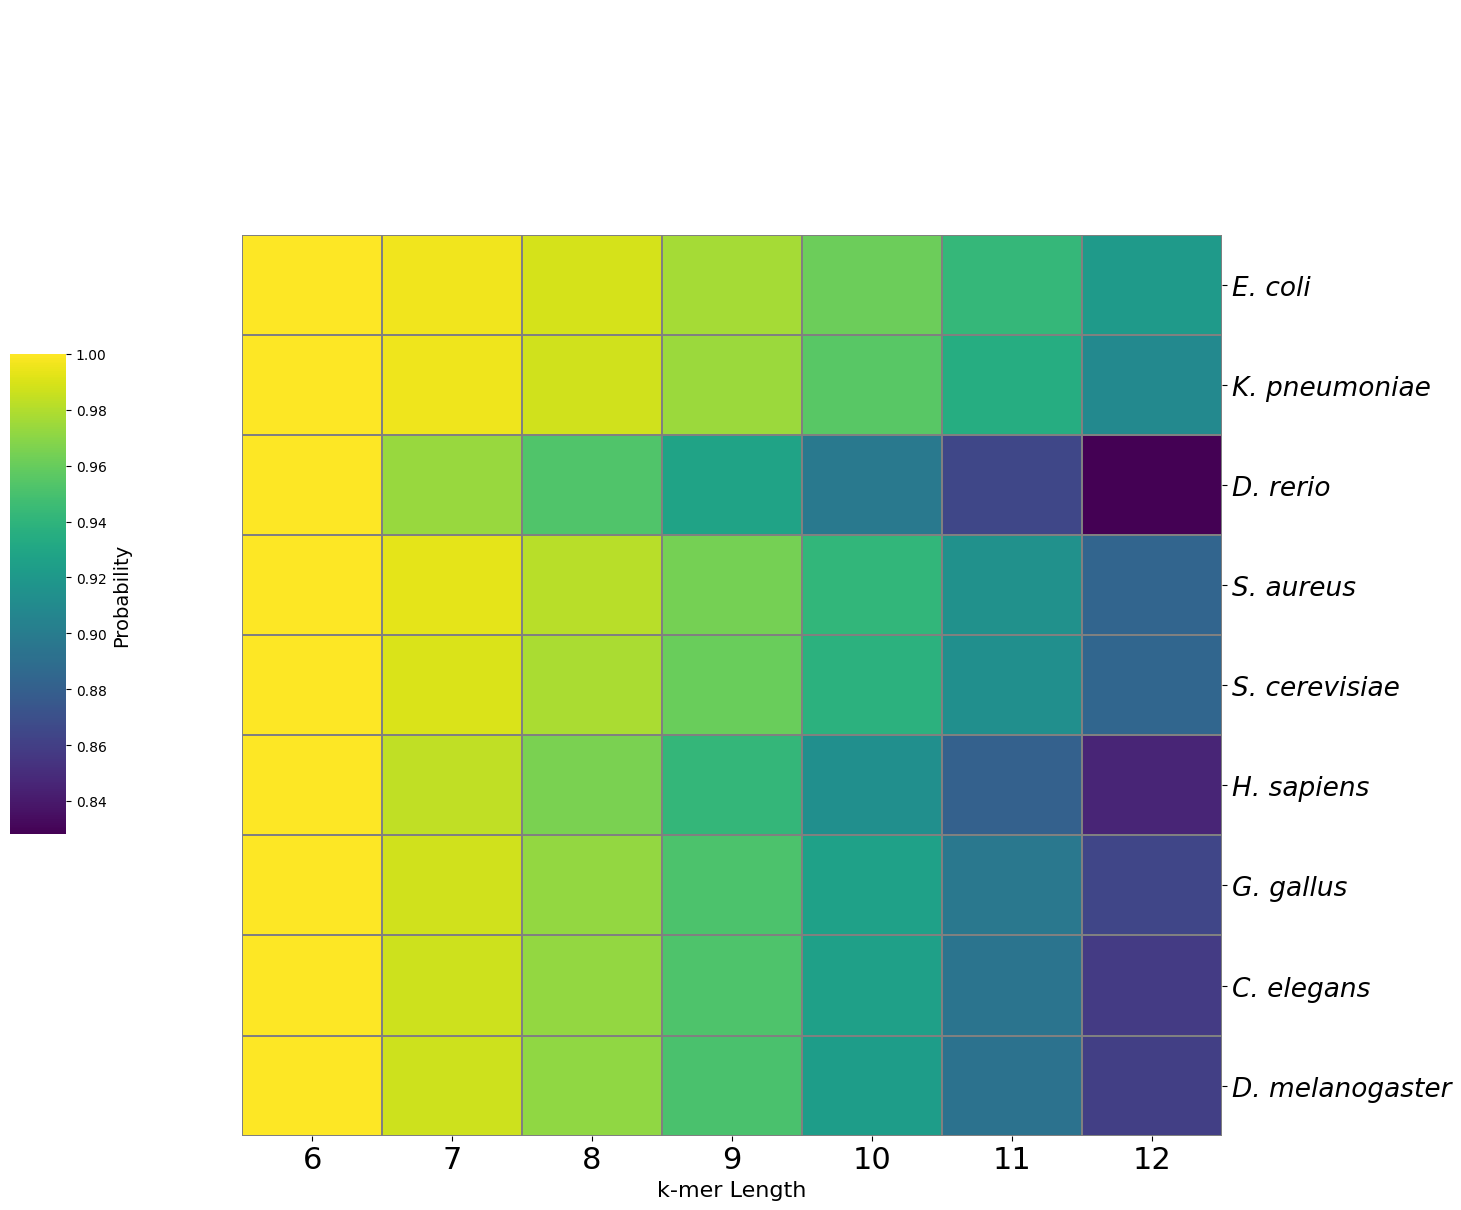

In [424]:
cg = sns.clustermap(data=pivot_table, 
                linecolor='gray', 
                cmap="viridis", 
                    col_cluster=False,
                lw=0.1, 
                figsize=(14, 12))
cg.ax_row_dendrogram.set_visible(False) 
cg.ax_row_dendrogram.set_visible(False) 
ax = cg.ax_heatmap
ax.tick_params(axis="both", labelsize=19)
ax.set_xlabel("k-mer Length")
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
cg.ax_cbar.set_ylabel("Probability")
cg.ax_cbar.yaxis.label.set_size(14)
ax.tick_params(axis="x", labelsize=22)

ax.set_ylabel("")

x0, _y0, _w, _h = cg.cbar_pos
cg.ax_cbar.set_position([x0, 0.3, 0.04, 0.4])

labels = ax.get_yticklabels()
for l in labels:
    l.set_style('italic')
# cg.ax_cbar.set_title('colorbar title')
# cg.ax_cbar.tick_params(axis='y', length=10)
# for spine in cg.ax_cbar.spines:
    # cg.ax_cbar.spines[spine].set_color('crimson')
    # cg.ax_cbar.spines[spine].set_linewidth(2)
save_location = Path("/storage/group/izg5139/default/external/zimie/probabilities")
save_location.mkdir(exist_ok=True)
plt.gcf().savefig(f"{save_location}/Z3_avoidmers_probabilities_per_organism.png", bbox_inches='tight')

In [352]:
model_organisms

[PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000008865.2_ASM886v2_genomic_abacaba_words_length_50.all_seqs.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000013425.1_ASM1342v1_genomic_abacaba_words_length_50.all_seqs.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/GCF_000240185.1_ASM24018v2_genomic_abacaba_words_length_50.all_seqs.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/ce11_abacaba_words_length_50.all_seqs.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0.shuffled_abacaba_words_length_50.all_seqs.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.all_seqs.txt'),
 PosixPath('/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/d

In [355]:
probabilities_df_abacaba

,organism,length,observed_probability,probability,organism_name
0,GCF_000008865.2,10,0.961337,0.965069,E. coli
1,GCF_000008865.2,11,0.942871,0.948469,E. coli
2,GCF_000008865.2,12,0.920851,0.929011,E. coli
3,GCF_000008865.2,2,1.000000,1.000000,E. coli
4,GCF_000008865.2,3,1.000000,1.000000,E. coli
...,...,...,...,...,...
105,sacCer3,5,1.000000,1.000000,S. cerevisiae
106,sacCer3,6,1.000000,1.000000,S. cerevisiae
107,sacCer3,7,0.990533,0.996094,S. cerevisiae
108,sacCer3,8,0.978299,0.988953,S. cerevisiae


In [354]:
organism_names_all

{'GCF_000002985.6': 'C. elegans',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli',
 'ce11': 'C. elegans',
 'sacCer3': 'S. cerevisiae',
 'chm13v2.0': 'H. sapiens'}

In [378]:
temp.melt(id_vars=['organism', 'length'], value_vars=['probability', 'observed_probability'])

,organism,length,variable,value
0,GCF_000008865.2,10,probability,0.965069
1,GCF_000008865.2,11,probability,0.948469
2,GCF_000008865.2,12,probability,0.929011
3,GCF_000008865.2,2,probability,1.000000
4,GCF_000008865.2,3,probability,1.000000
5,GCF_000008865.2,4,probability,1.000000
6,GCF_000008865.2,5,probability,1.000000
7,GCF_000008865.2,6,probability,1.000000
8,GCF_000008865.2,7,probability,0.996094
9,GCF_000008865.2,8,probability,0.988953


In [ ]:
# "([agct]{10,})[agct]{,8}\1"
# seq <----

GCF_000008865.2


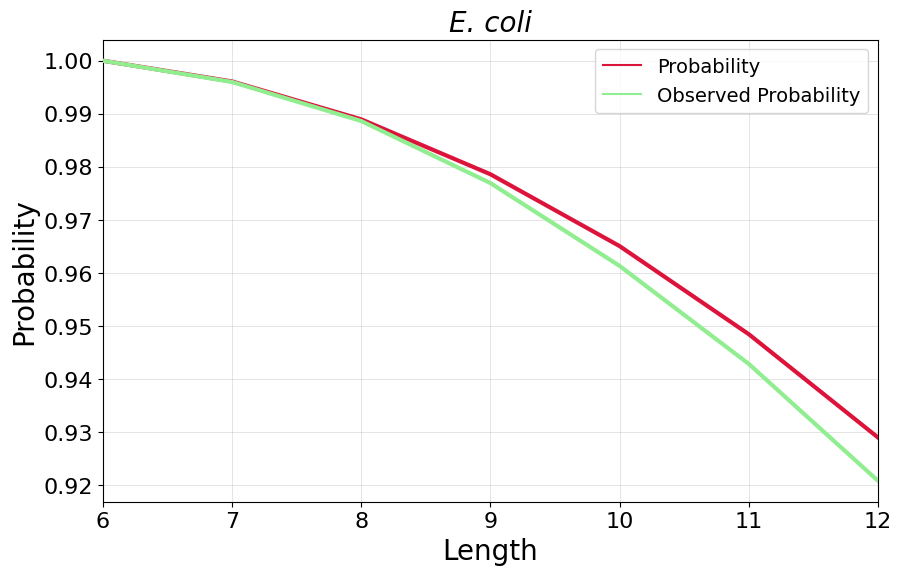

GCF_000013425.1


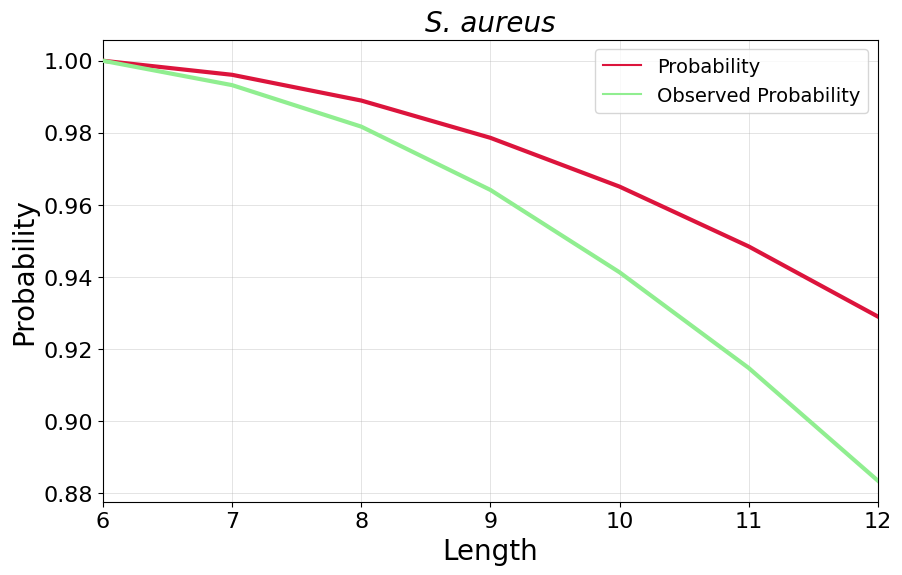

GCF_000240185.1


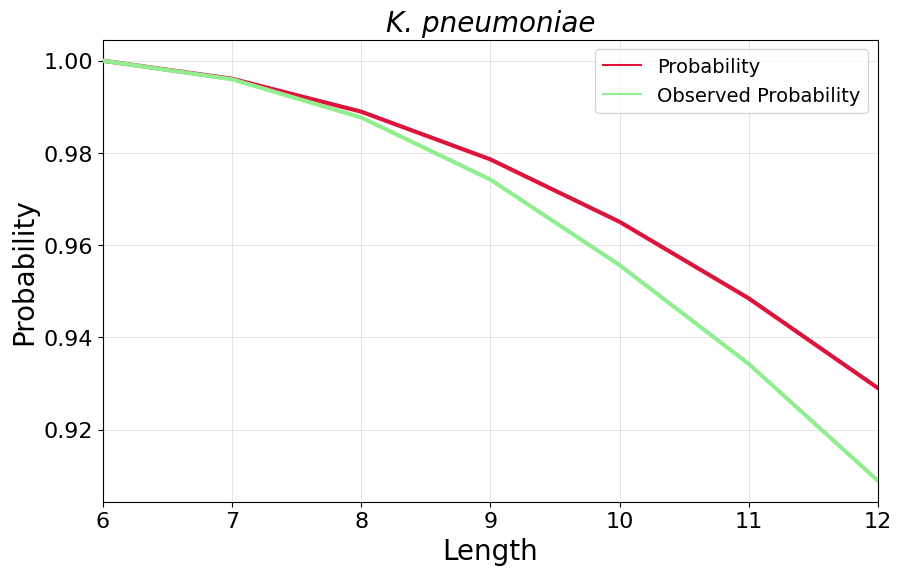

ce11


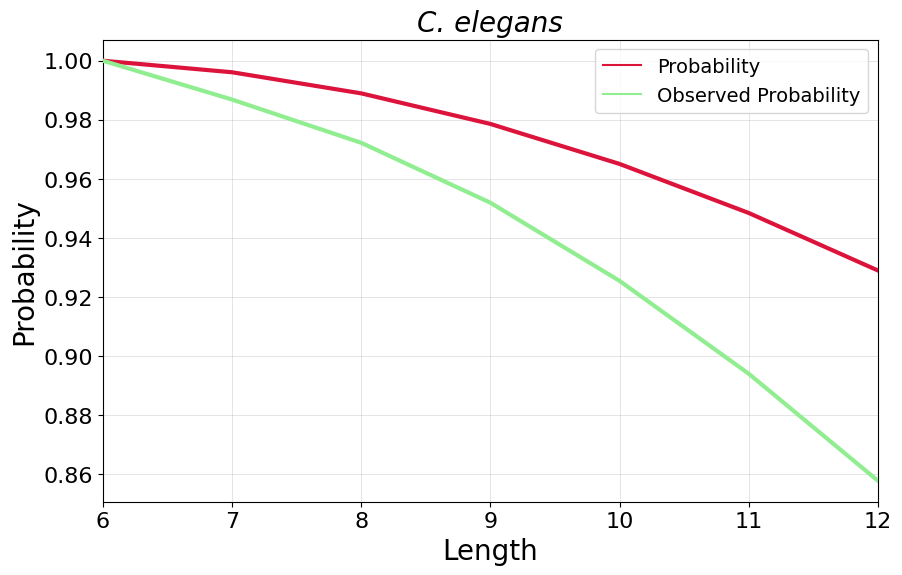

danRer11


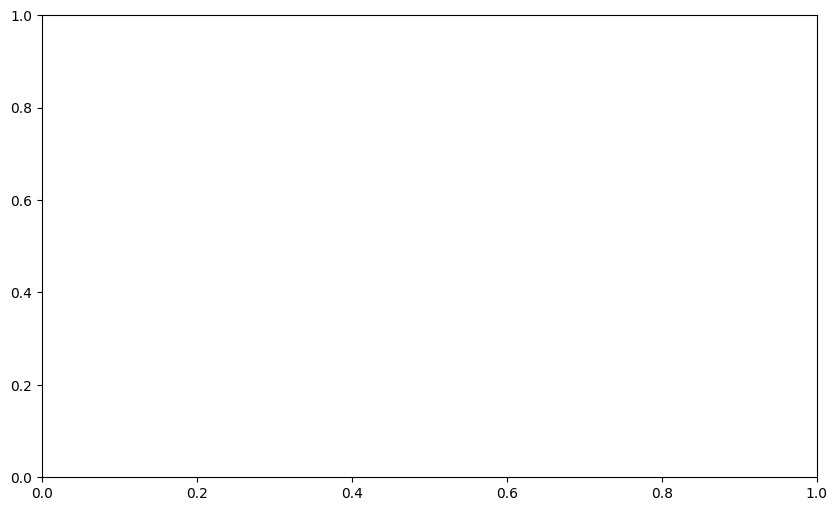

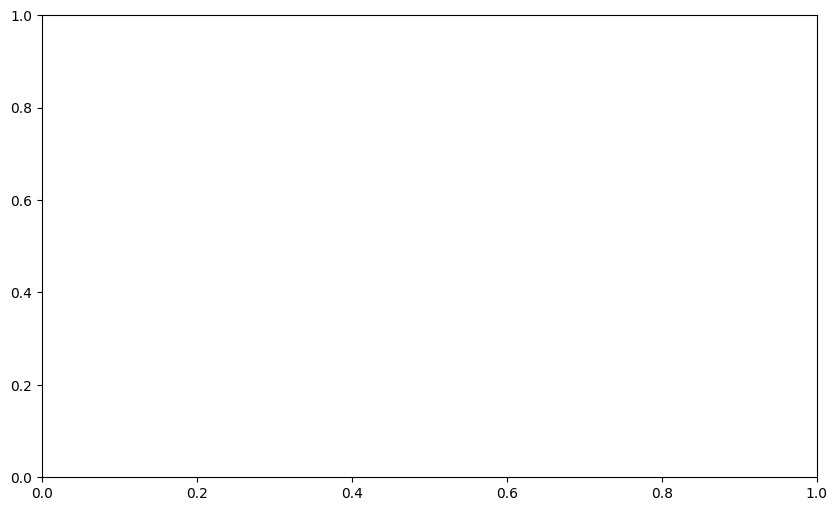

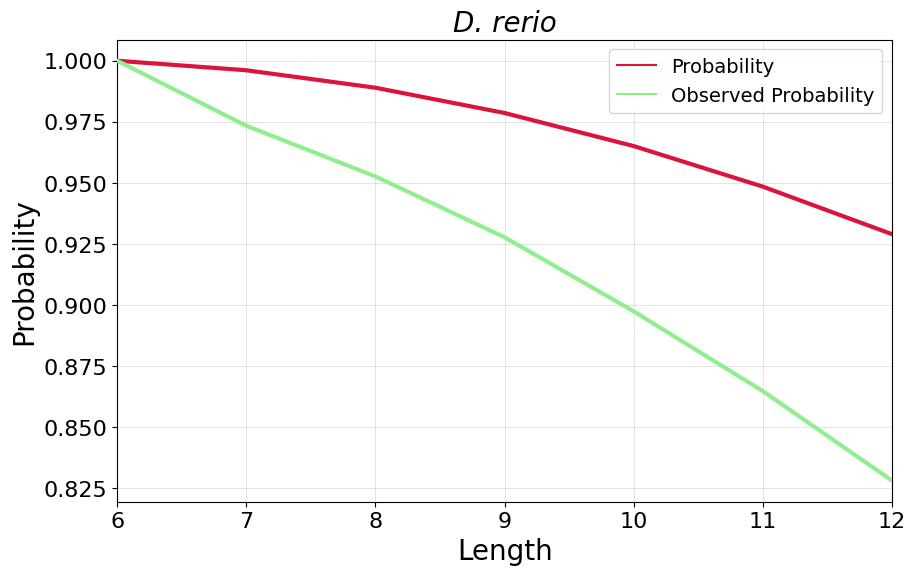

dm6


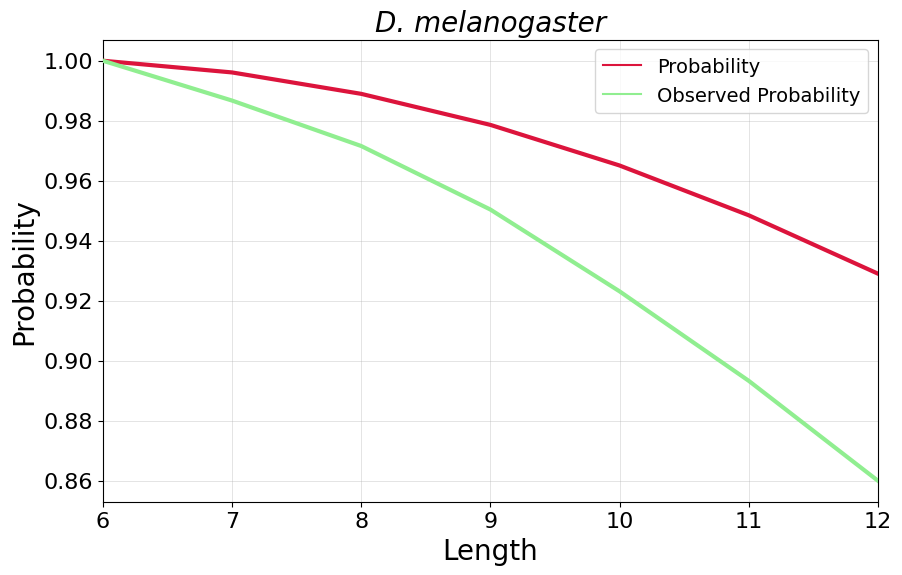

galGal6


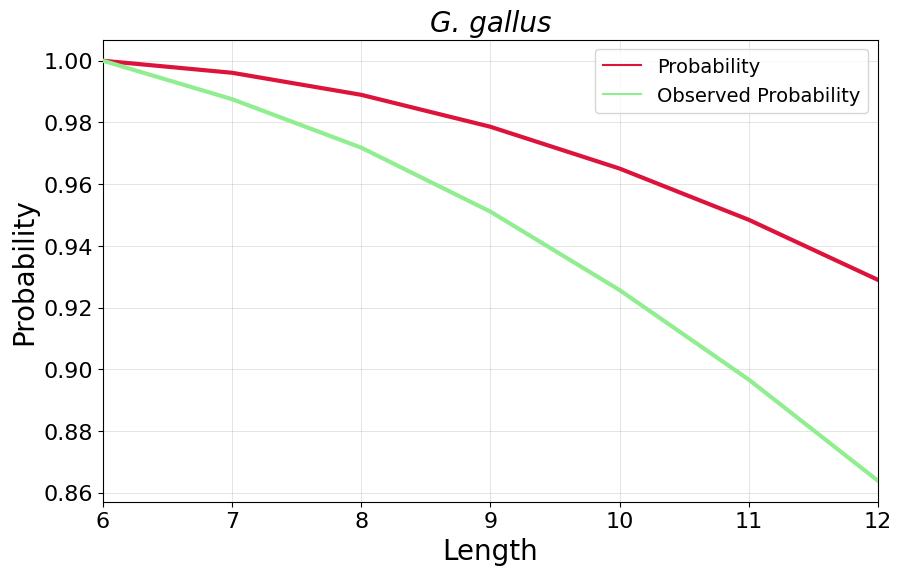

sacCer3


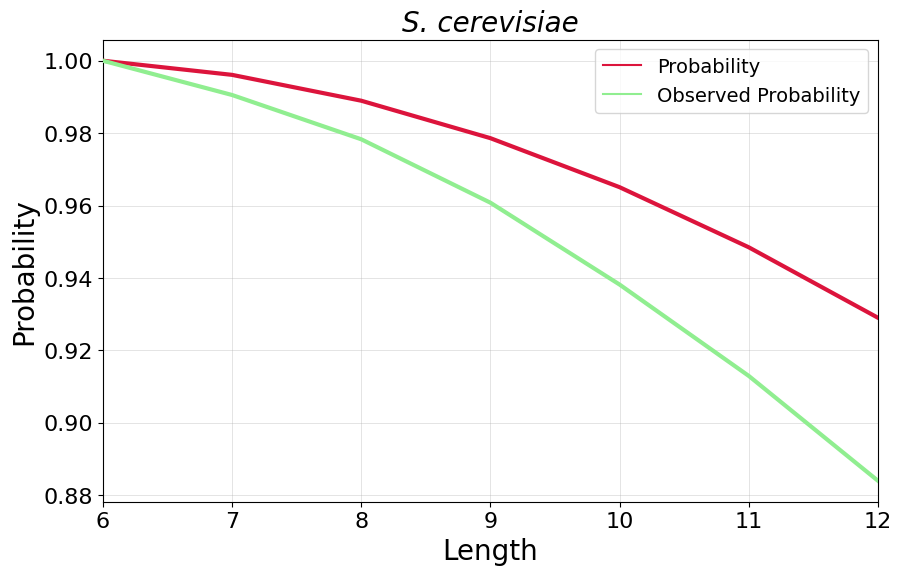

In [394]:

for organism in model_organisms:
    fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    name = organism.name
    if "GC" in name:
        name = "_".join(name.split("_")[:2])
    else:
        name = name.split("_")[0]

    if "chm13v2" in name:
        continue

    
    organism_ = organism_names_all[name]
    temp = probabilities_df_abacaba[probabilities_df_abacaba['organism'] == name].melt(id_vars=['organism', 'length'], value_vars=['probability', 'observed_probability'])
    temp["variable"] = temp["variable"].replace("observed_probability", "Observed Probability").replace("probability", "Probability")
    sns.lineplot(data=temp, 
                 x="length",
                 y="value",
                 hue="variable",
                 palette={"Probability": "crimson",
                          "Observed Probability": "lightgreen",
                         },
                 lw=3.0,
                 ax=ax,
            zorder=3
    )
    ax.set_title(organism_names_all[name], style='italic')
    ax.title.set_size(20)

    ax.grid(lw=0.4, alpha=0.6)
    ax.set_xlim(xmin=6, xmax=12)
    ax.legend(title="", prop={"size": 14})
    ax.set_xlabel("Length")
    ax.set_ylabel("Probability")
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis="both", labelsize=16)

    save_location = Path("/storage/group/izg5139/default/external/zimie/probabilities")
    save_location.mkdir(exist_ok=True)
    plt.gcf().savefig(f"{save_location}/expected_vs_observed_{name}_avoidmers_probability_up_to_12mers.png", bbox_inches='tight')
    plt.show()
    plt.close()
    

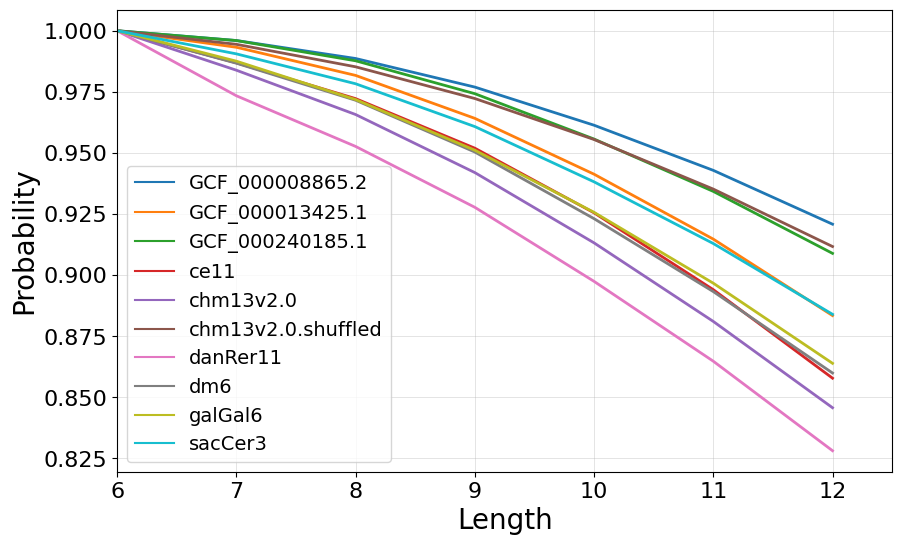

In [353]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

temp = probabilities_df_abacaba
sns.lineplot(data=temp,
             x="length",
             y="observed_probability",
             hue="organism",
             lw=2.0,
            ax=ax
)
ax.grid(lw=0.4, alpha=0.6)
ax.set_xlim(xmin=6)
ax.legend(title="", prop={"size": 14})
ax.set_xlabel("Length")
ax.set_ylabel("Probability")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis="both", labelsize=16)

In [ ]:
fig , ax = plt.subplots(nrows=1,ncols=1, figsize=(10, 6))

temp = probabilities_df_abacaba[probabilities_df_abacaba["organism"].str.startswith("chm13")]
sns.lineplot(data=temp,
             x="length",
             y="observed_probability",
             hue="organism",
             lw=2.0,
            ax=ax
)
ax.grid(lw=0.4, alpha=0.6)
ax.set_xlim(xmin=6)
ax.legend(title="", prop={"size": 14})
ax.set_xlabel("Length")
ax.set_ylabel("Probability")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis="both", labelsize=16)

In [ ]:
from tqdm import tqdm
from collections import defaultdict 

probabilities = defaultdict(list)
level = 3
for kmer_length in tqdm(range(2, 15), total=13):
    jelly_df = pd.read_csv(
                           jellymers[kmer_length],
                           delimiter=" ",
                           header=None,
                           names=["kmer", "occurrences"]
                          )
    jelly_df.loc[:, "kmer"] = jelly_df["kmer"].str.lower()
    total_occurrences = jelly_df["occurrences"].sum()

    theoretical_avoidmers = read_avoidmers(kmer_length)
    total_theoretical_avoidmers = len(theoretical_avoidmers)
    probability_for_avoidmer = total_theoretical_avoidmers / 4 ** kmer_length
    
    jelly_df = jelly_df[jelly_df["kmer"].isin(theoretical_avoidmers)]
    total_avoidmers = jelly_df["occurrences"].sum()

    probabilities["length"].append(kmer_length)
    probabilities["observed_probability"].append(total_avoidmers / total_occurrences)
    probabilities["probability"].append(probability_for_avoidmer)

probabilities_df_abacaba = pd.DataFrame(probabilities)
probabilities_df_abacaba

In [ ]:
from tqdm import tqdm
from collections import defaultdict 

probabilities = defaultdict(list)
level = 3
for kmer_length in tqdm(range(2, 15), total=13):
    jelly_df = pd.read_csv(
                           jellymers[kmer_length],
                           delimiter=" ",
                           header=None,
                           names=["kmer", "occurrences"]
                          )
    jelly_df.loc[:, "kmer"] = jelly_df["kmer"].str.lower()
    total_occurrences = jelly_df["occurrences"].sum()

    theoretical_avoidmers = read_avoidmers(kmer_length)
    total_theoretical_avoidmers = len(theoretical_avoidmers)
    probability_for_avoidmer = total_theoretical_avoidmers / 4 ** kmer_length
    
    jelly_df = jelly_df[jelly_df["kmer"].isin(theoretical_avoidmers)]
    total_avoidmers = jelly_df["occurrences"].sum()

    probabilities["length"].append(kmer_length)
    probabilities["observed_probability"].append(total_avoidmers / total_occurrences)
    probabilities["probability"].append(probability_for_avoidmer)

probabilities_df_abacaba = pd.DataFrame(probabilities)
probabilities_df_abacaba

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

above_5_abacaba = probabilities_df_abacaba[probabilities_df_abacaba["length"] > 5]
sns.lineplot(data=above_5_abacaba, x="length", y="probability", lw=2.0, linestyle='--', marker='o', markersize=7, color='crimson', label='Expected', ax=ax, zorder=0)
sns.lineplot(data=above_5_abacaba, x="length", y="observed_probability", lw=2.0, color='black', label='CHM13v2 T2T', ax=ax, zorder=0)

ax.grid(lw=0.4, alpha=0.6, zorder=3)
ax.set_xlabel("k-mer Length")
ax.xaxis.label.set_size(20)

ax.set_ylabel("ABACABA Avoiding Probability")
ax.yaxis.label.set_size(20)

ax.tick_params(axis="both", labelsize=14)
ax.set_axisbelow(True)

save_location = Path("/storage/group/izg5139/default/external/zimie")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/abacaba_avoiding_expected_vs_observed.png", bbox_inches='tight')